# **Table of Contents**

Project Overview

*   Background
*   Problem Statement
*   Research Questions

Milestone 2 Progress

*   Step 0: Import everything we'll need
*   Step 1: Download the original data from Kaggle
*   Step 2: Create dataframe
*   Step 3: Evaluate missing data
*   Step 4: Evaluate data imbalance
*   Step 5: Data scaling
*   Step 6: One-Hot Coding

Milestone 3 Progress

*   Step 1: Summary of Data
** Histograms & Count Plots
** Correlation Plots
** Clustering
*   Step 2: Deeper understanding of the data
*   Step 3: Meaningful insights
*   Step 4: Baseline model
** kNN Model
** Logistic Regression

Milestone 4 Progress

*   Final Model Pipeline
** Decision Tree
** Decision Tree with bagging
** Random Forest
** Boosting
** Decision Tree with Random Forest
** Summary of all model results
*   Interpretation of Results

Conclusion of Team 9's Project Voyage! ✨

References
*   Dataset
*   Literature

## Project Overview


---





#### **Background**

Sleep disorders are a prevalent problem in the U.S., affecting about 50 to 70 million Americans [[1]](https://colab.research.google.com/drive/1E0ONJaL1ryvbqMlSLuX7f9XZUrvTIkXl#scrollTo=C_8ZrV2TcBPD&line=3&uniqifier=1). Sleep disorders typically involve problems with the quality, quanitity, and/or timing of sleep and can significantly impact an individual's quality of life [[2]](https://colab.research.google.com/drive/1E0ONJaL1ryvbqMlSLuX7f9XZUrvTIkXl#scrollTo=C_8ZrV2TcBPD&line=5&uniqifier=1).

#### **Problem Statement**

Given the prevalence and impact of sleep disorders, our group was interested in exploring the relationships that exist between an individuals health metrics, lifestyle characteristics, and sleep disorder status. In particular, we were interested in whether these relationships could be used to predict an individual's risk of developing a sleep disorder, for preventative and/or diagnositic purposes.

We explored these relationships using a dataset containing health metrics (age, heart rate, BMI category, etc.), lifestyle factors (physical activity level, stress level, occupation, etc.) and sleep disorder status (None, Insomnia, and Sleep Apnea).

#### **Research Questions**

***Primary Question:***

*   Can we use the health and lifestyle features in our dataset to predict whether someone has a sleep disorder?

***Additional/Sub Questions:***
*   Can we accurately predict whether or not someone has a sleep disorder? If so, can we differentiate between sleep apnea and insomnia?
*   Which sleep health and lifestyle factors are most correlated with sleep disorder status? How do these correlations change for sleep apnea vs. insomnia?  
*   What are the causal relationships between sleep disorder status and health metrics/lifestyle factors, and how do these factors influence these relationships (while accounting for potential confounding variables)?



## Milestone 2 Progress


---



#### **Step 0**: Import everything we'll need


In [ ]:
import kagglehub
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, accuracy_score,mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier

#### **Step 1**: Download the original data from Kaggle


In [ ]:
# Download latest version
path = kagglehub.dataset_download("uom190346a/sleep-health-and-lifestyle-dataset")
csv_file_path = os.path.join(path, "Sleep_health_and_lifestyle_dataset.csv")

print("Path to dataset files:", csv_file_path)

100%|██████████| 2.54k/2.54k [00:00<00:00, 666kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/uom190346a/sleep-health-and-lifestyle-dataset/versions/2/Sleep_health_and_lifestyle_dataset.csv


#### **Step 2**: Create dataframe


In [ ]:
# Save csv to dataframe
df = pd.read_csv(csv_file_path)
# Display head of dataframe
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:
#Display all the types within each occuptation (note: some later will be potentially one-hot encoded)
# The data set description already gives us the categories for: Gender, BMI Category, Sleep Disorder
# The data set already gives us the range for: Quality of Sleep, Sterss Level
unique_occupations = df['Occupation'].unique()
print(f"Unique occupations: {unique_occupations}" )

unique_BMI = df['BMI Category'].unique()
print(f"Unique BMI: {unique_BMI}" )

unique_SleepDisorder = df['Sleep Disorder'].unique()
print(f"Unique Sleep Disorder: {unique_SleepDisorder}" )


Unique occupations: ['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']
Unique BMI: ['Overweight' 'Normal' 'Obese' 'Normal Weight']
Unique Sleep Disorder: [nan 'Sleep Apnea' 'Insomnia']


#### **Step 3**: Evaluate Missing Data


In [ ]:
# Evaluate missing data for each variable
for column in df.columns: # Loop through each variable (columns)
  missing_count = df[column].isnull().sum() # Gives me the total number of missing fields
  missing_percentage = (missing_count / len(df)) * 100 # Returns as a percentage
  print(f"{column}: Missing Count = {missing_count}, Missing Percentage = {missing_percentage:.2f}%") # Makes the count & percentage visible

Person ID: Missing Count = 0, Missing Percentage = 0.00%
Gender: Missing Count = 0, Missing Percentage = 0.00%
Age: Missing Count = 0, Missing Percentage = 0.00%
Occupation: Missing Count = 0, Missing Percentage = 0.00%
Sleep Duration: Missing Count = 0, Missing Percentage = 0.00%
Quality of Sleep: Missing Count = 0, Missing Percentage = 0.00%
Physical Activity Level: Missing Count = 0, Missing Percentage = 0.00%
Stress Level: Missing Count = 0, Missing Percentage = 0.00%
BMI Category: Missing Count = 0, Missing Percentage = 0.00%
Blood Pressure: Missing Count = 0, Missing Percentage = 0.00%
Heart Rate: Missing Count = 0, Missing Percentage = 0.00%
Daily Steps: Missing Count = 0, Missing Percentage = 0.00%
Sleep Disorder: Missing Count = 219, Missing Percentage = 58.56%


From the print out above, we can see that all fields but Sleep Disorder return no missing fields!

For the Sleeping Disorder field, the missing count is actually referring to individuals that do not have a sleeping disorder (field value = NaN). We will fix this with one hot coding.

Therefore, we can conclude **no deletion of imputation of missing data is required for this data set!**


#### **Step 4**: Evaluate Data Imbalance


*In order to begin to analyze data imbalance, we will start by looking at the unique values for each categorical column and histograms for each numerical column in the DataFrame*

**Gender**

There are two options for gender in this dataset: Male and Female.

This column is balanced, with 189 male entries and 185 female entries.

Value counts:
Gender
Male      189
Female    185
Name: count, dtype: int64


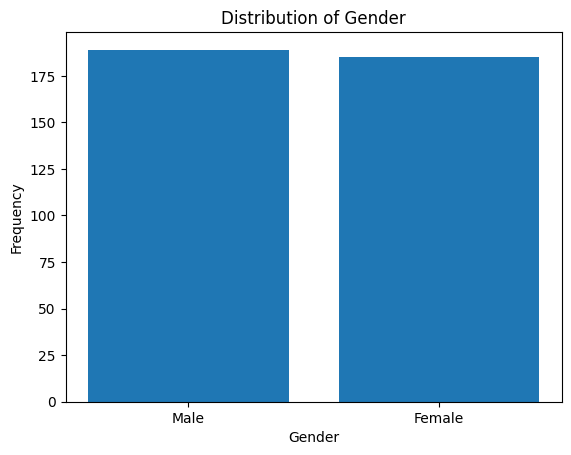

In [ ]:
column = 'Gender'
unique_values = df[column].unique()
unique_counts = df[column].value_counts()

print("Value counts:")
print(unique_counts)

plt.figure()
plt.bar(unique_values, df[column].value_counts())
plt.title(f"Distribution of {column}")
plt.xlabel(column)
plt.ylabel("Frequency")
plt.show()

**Age**

The data here is organized in bins  of 5 year intervals.

This column is not entirely balanced, with 4 of the bins averaging around 35, but the main chunk of people residing in the Age 40-45 column (which could make sense for a sleep study, but it is important to keep in mind that this is synthetic data, so when the creator was generating the data they could have tried to balance out the groups here a bit more.)

This is good to take into consideration because the sleep disorders that may develop over the course of one’s life, which is compounded by the variables we are analyzing, could affect our overall conclusion



The range of age values is: 27-59
The mean of age values is: 42.18449197860963


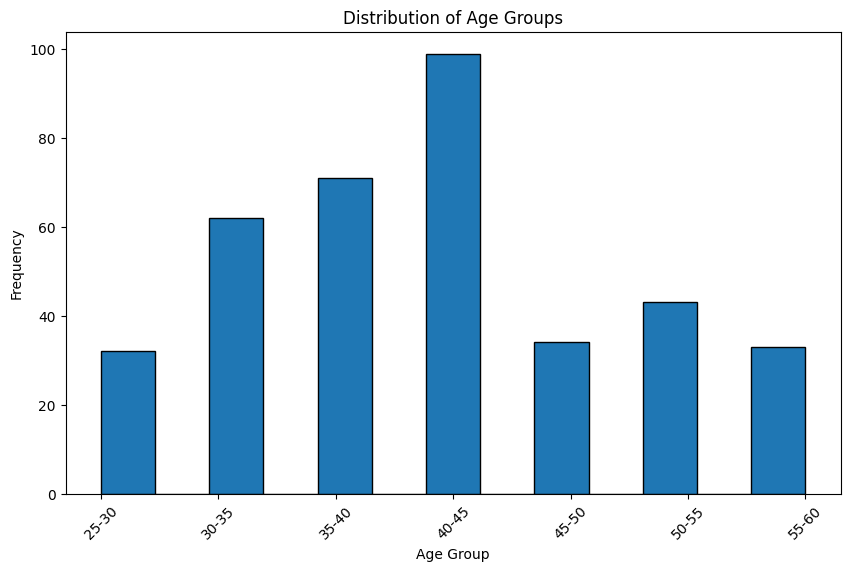

In [ ]:
print(f"The range of age values is: {df['Age'].min()}-{df['Age'].max()}")
print(f"The mean of age values is: {df['Age'].mean()}")

# Create bins for age groups
bins = range(15, 81, 5)  # Adjust the range based on your data
labels = [f"{i}-{i+5}" for i in bins[:-1]]

# Bin the 'Age' column
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)

# Create a histogram of the Age groups
plt.figure(figsize=(10, 6))
plt.hist(df['Age_Group'], bins=len(labels), edgecolor='black')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.title('Distribution of Age Groups')
plt.xticks(rotation=45)
plt.show()

**Occupation**

There are 11 unique occupations in the original dataset.

We can reduce the total number of occupations by combining similar fields. We can combine the "Salesperson" and "Sales Representative" entries into a single category. We can also combine the "Engineer" and "Software Engineer" entries into a single category.

This dataset is imbalanced, as a large percentage represents individuals in the healthcare field (Nurses and Doctors).

In [ ]:
# Replace "Sales Representative" with "Salesperson" and "Software Engineer" with "Engineer"
df['Occupation'] = df['Occupation'].replace({'Sales Representative': 'Salesperson', 'Software Engineer': 'Engineer'})

Value counts:
Occupation
Nurse          73
Doctor         71
Engineer       67
Lawyer         47
Teacher        40
Accountant     37
Salesperson    34
Scientist       4
Manager         1
Name: count, dtype: int64


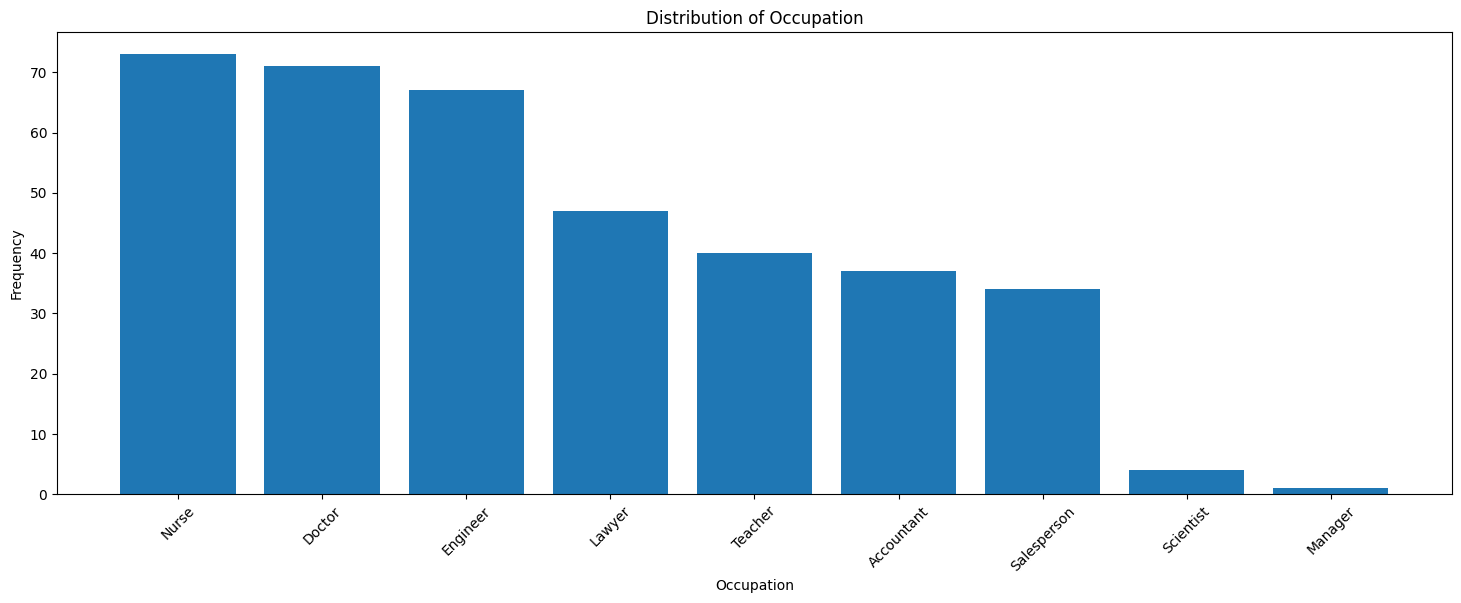

In [ ]:
column = 'Occupation'
unique_counts = df[column].value_counts()

print("Value counts:")
print(unique_counts)

plt.figure(figsize=(18,6))
plt.bar(unique_counts.index, unique_counts.values)
plt.title(f"Distribution of {column}")
plt.xlabel(column)
plt.ylabel("Frequency")
plt.xticks(rotation=45)  # Rotate labels
plt.show()

**Sleep Duration**

The sleep duration ranges from 5.8 to 8.5 hours.

Looking at the histogram below, it appears to be approximately balanced across all values. It is interesting to note the 6.5-7 for some reason is quite low, but the 5.5-6 hours isn't surprising that it is lower than the rest (as that is a significantly poor sleep duration amount.)

The range of sleep duration values is: 5.8-8.5


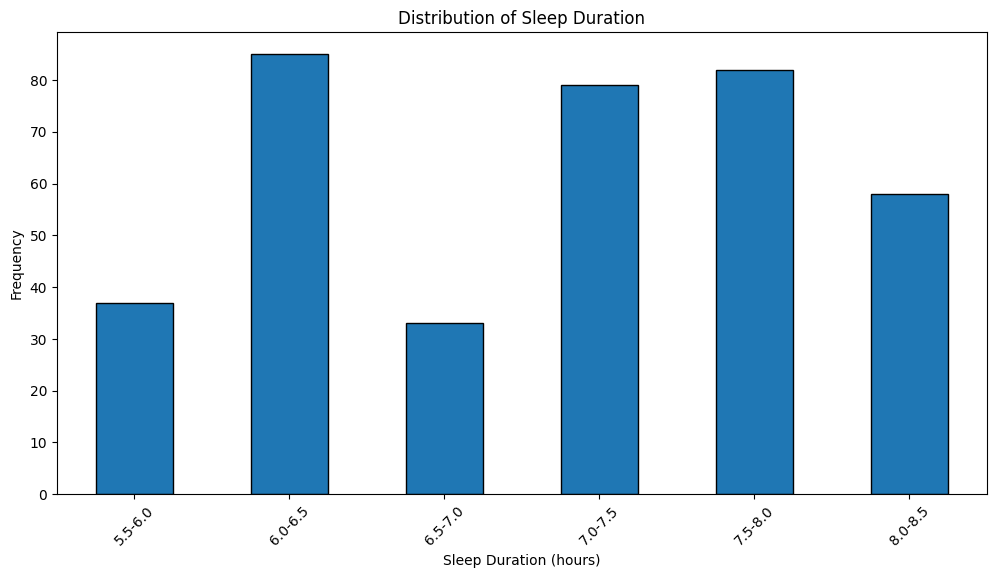

In [ ]:
print(f"The range of sleep duration values is: {df['Sleep Duration'].min()}-{df['Sleep Duration'].max()}")

# Create bins in half-hour intervals
bins = np.arange(5.5, df['Sleep Duration'].max() + 0.5, 0.5)  # 0.5-hour intervals
labels = [f"{i}-{i+0.5}" for i in bins[:-1]]

# Bin the 'Sleep Duration' column
df['Sleep_Duration_Groups'] = pd.cut(df['Sleep Duration'], bins=bins, labels=labels, include_lowest=True)

# Create a histogram of the Sleep Duration groups
plt.figure(figsize=(12, 6))
df['Sleep_Duration_Groups'].value_counts(sort=False).plot(kind='bar', edgecolor='black')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Frequency')
plt.title('Distribution of Sleep Duration')
plt.xticks(rotation=45)
plt.show()

**Quality of Sleep**

This variable evidently appears to be skewed more towards those who rate their sleep quality as higher (with the quality 4-6 being almost non-existent.)

The range of sleep quality values is: 4-9


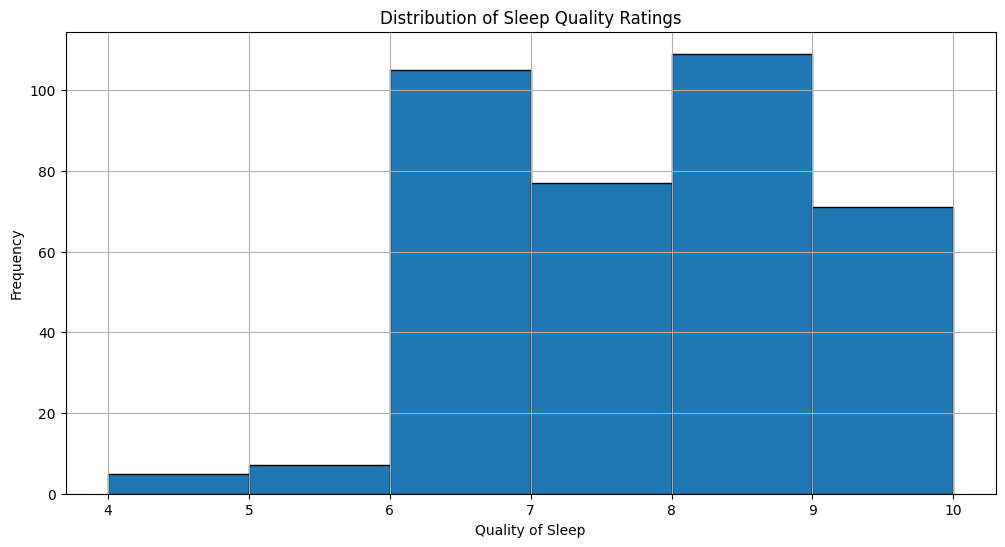

In [ ]:
# Display the range of sleep quality values
print(f"The range of sleep quality values is: {df['Quality of Sleep'].min()}-{df['Quality of Sleep'].max()}")

# Define bins in increments of 1 for sleep quality
bins = np.arange(df['Quality of Sleep'].min(), df['Quality of Sleep'].max() + 2, 1)

# Plot histogram directly on 'Quality of Sleep' column
plt.figure(figsize=(12, 6))
plt.hist(df['Quality of Sleep'], bins=bins, edgecolor='black')
plt.xlabel('Quality of Sleep')
plt.ylabel('Frequency')
plt.title('Distribution of Sleep Quality Ratings')
plt.xticks(bins)  # Set x-ticks to align with bins
plt.grid()
plt.show()

**Physical Activity Level**

This variable appears to be approximately equally distributed across all self-reported physical activity level ratings. However, does appear to be a significantly lower number of ratings between 50-60 and 80-90.

The range of physical activity values is: 30-90


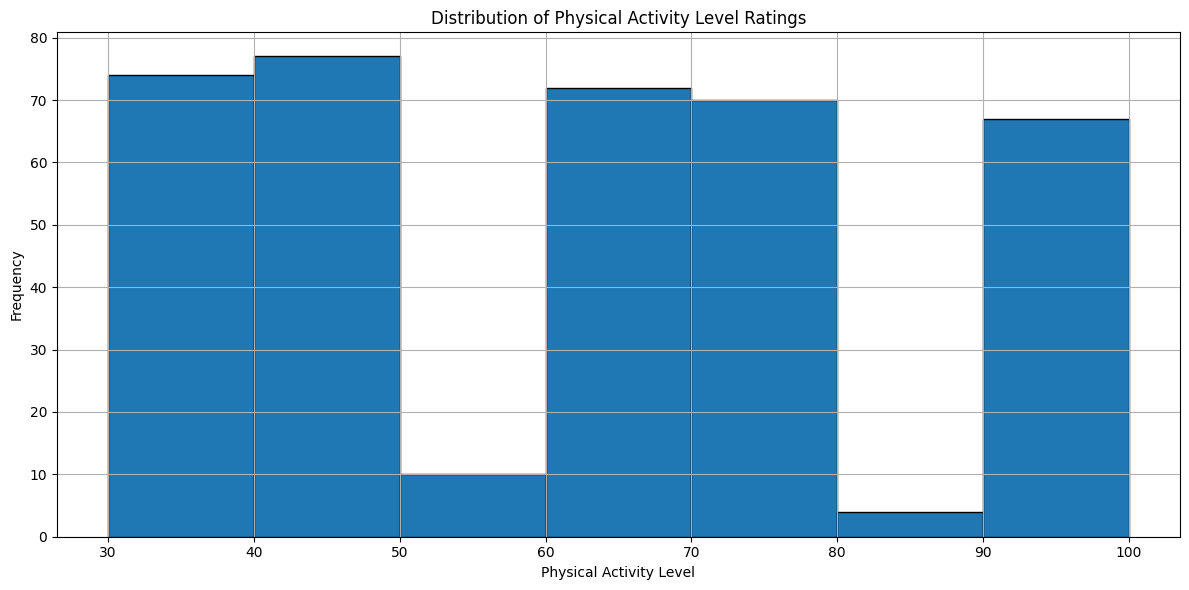

In [ ]:
# Display the range of physical activity values
print(f"The range of physical activity values is: {df['Physical Activity Level'].min()}-{df['Physical Activity Level'].max()}")

# Define bins in increments of 10 for sleep quality
bins = np.arange(df['Physical Activity Level'].min(), df['Physical Activity Level'].max() + 20, 10)

# Plot histogram directly on 'Quality of Sleep' column
plt.figure(figsize=(12, 6))
plt.hist(df['Physical Activity Level'], bins=bins, edgecolor='black')
plt.xlabel('Physical Activity Level')
plt.ylabel('Frequency')
plt.title('Distribution of Physical Activity Level Ratings')
plt.xticks(bins)  # Set x-ticks to align with bins
plt.grid()
plt.tight_layout()

**Stress Level**

This is quite a well balanced column, thoguh there are a few dips frmo 6-8, overall it looks distributed well. This is good as we can more accurately analyze if stress has a direct correlation with a sleep disorder (unless it is confounding which we will analyze later.)

The range of stress level ratings is: 3-8


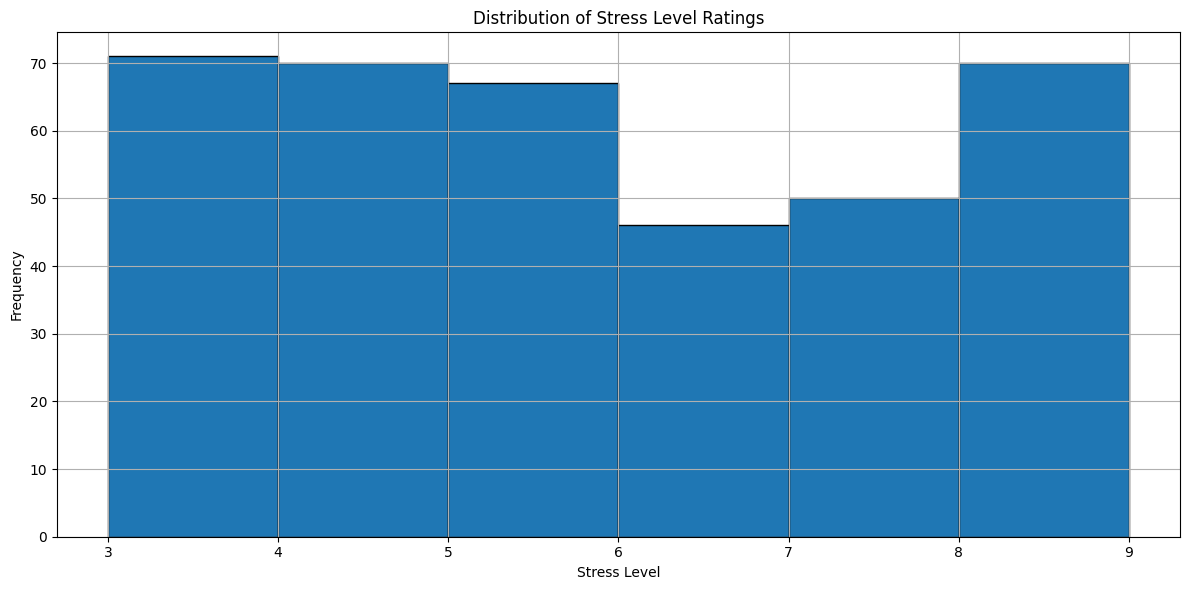

In [ ]:
# From the first analysis block, we know that the range of stress level is 1-10
# Define bins in increments of 1 for stress level

print(f"The range of stress level ratings is: {df['Stress Level'].min()}-{df['Stress Level'].max()}")

bins = np.arange(df['Stress Level'].min(), df['Stress Level'].max()+2, 1)

# Plot histogram directly on 'Quality of Sleep' column
plt.figure(figsize=(12, 6))
plt.hist(df['Stress Level'], bins=bins, edgecolor='black')
plt.xlabel('Stress Level')
plt.ylabel('Frequency')
plt.title('Distribution of Stress Level Ratings')
plt.xticks(bins)  # Set x-ticks to align with bins
plt.grid()
plt.tight_layout()

**BMI Category**

The first item that we had to tackle here before analyzing the visual analysis is to change the Normal Weight entries to match the entry: Normal since they represent the same group and we didn't want the column split (since that would result in a clear duplication of value and water down our impact of variables here, as well as make it confounding since they represent the same category of the BMI Variable.)

After this, we can see that the Obese category has a significant lower amount of spread in this data set, with even Oveweight falling behind by about 50. This is good to take note of for when we try to conduct analysis on the correlation, using such a low amount for 1-2 of these catetgories in this variable.

In [ ]:
# Change "Normal Weight" entries in the "BMI Category" column of my dataframe to "Normal" (since they represent the same group)
df['BMI Category'] = df['BMI Category'].replace('Normal Weight', 'Normal')

Value counts:
BMI Category
Normal        216
Overweight    148
Obese          10
Name: count, dtype: int64


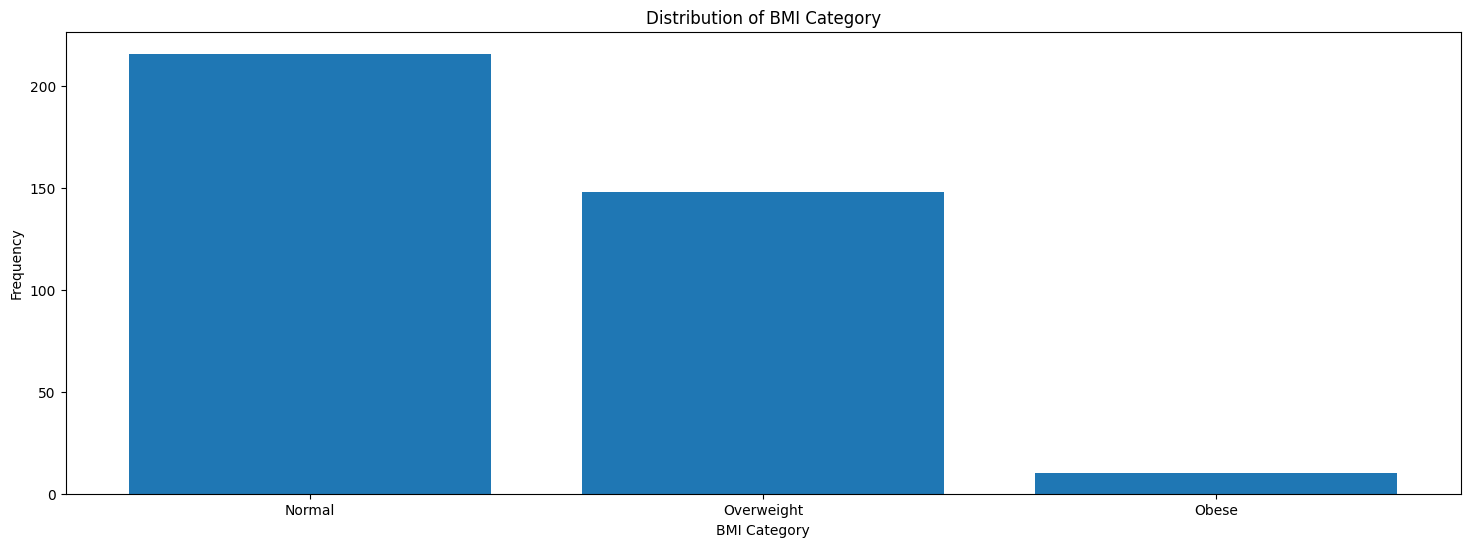

In [ ]:
column_BMI = 'BMI Category'
unique_counts_BMI = df[column_BMI].value_counts()

print("Value counts:")
print(unique_counts_BMI)

plt.figure(figsize=(18,6))
plt.bar(unique_counts_BMI.index, unique_counts_BMI.values)
plt.title(f"Distribution of {column_BMI}")
plt.xlabel(column_BMI)
plt.ylabel("Frequency")
plt.show()

**Blood Pressure**

Blood pressure was a bit of a tricky one here because we wanted to split out the two components - systolic and diastolic, so that we could correctly plug in an integer variable (not 2 components that both indicate integers aka dividing it into 1 integer would be an incorrect approach.)

We can see that both are quite well distributed, even in comparison to each other.

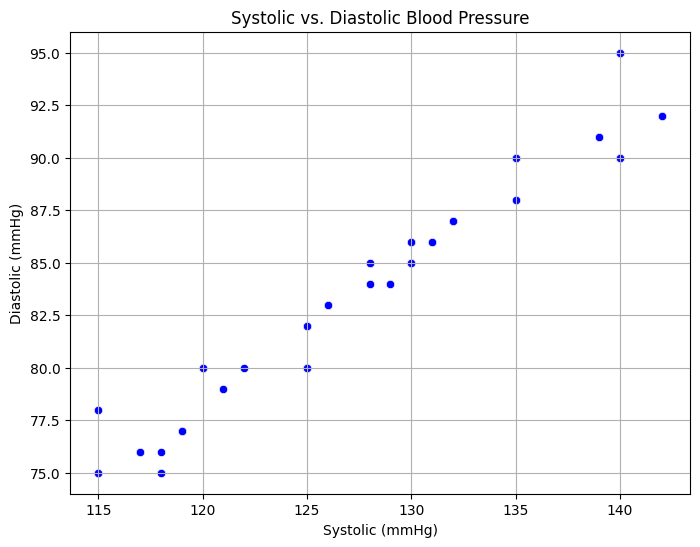

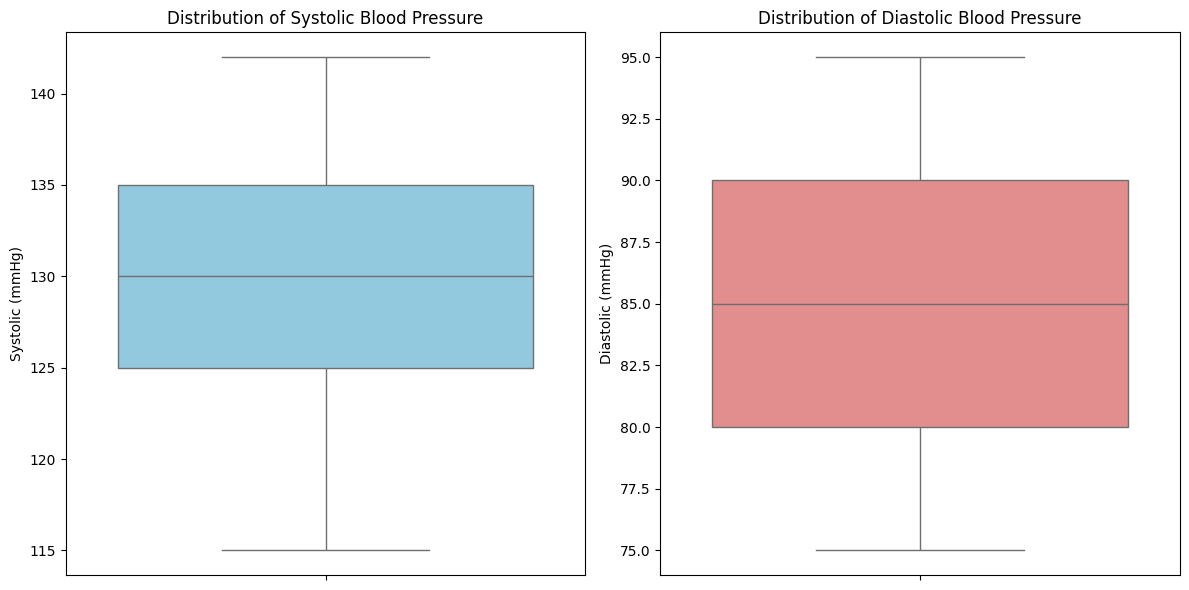

In [ ]:
#To plot the trends in blood pressure, we would want to first separate the systolic and diastolic values

# Split the 'blood_pressure' column into 'systolic' and 'diastolic'
df[['systolic', 'diastolic']] = df['Blood Pressure'].str.split('/', expand=True)

# Drop the original blood pressure
df.drop(columns=['Blood Pressure'], inplace=True)

# Convert to numeric values
df['systolic'] = pd.to_numeric(df['systolic'])
df['diastolic'] = pd.to_numeric(df['diastolic'])

# Plot 1: Scatter Plot of Systolic vs Diastolic
plt.figure(figsize=(8, 6))
sns.scatterplot(x='systolic', y='diastolic', data=df, color='blue')
plt.title("Systolic vs. Diastolic Blood Pressure")
plt.xlabel("Systolic (mmHg)")
plt.ylabel("Diastolic (mmHg)")
plt.grid(True)
plt.show()

# Optional Plot 2: Distribution of Systolic and Diastolic Pressure
plt.figure(figsize=(12, 6))

# Box plot for Systolic
plt.subplot(1, 2, 1)
sns.boxplot(y='systolic', data=df, color='skyblue')
plt.title("Distribution of Systolic Blood Pressure")
plt.ylabel("Systolic (mmHg)")

# Box plot for Diastolic
plt.subplot(1, 2, 2)
sns.boxplot(y='diastolic', data=df, color='lightcoral')
plt.title("Distribution of Diastolic Blood Pressure")
plt.ylabel("Diastolic (mmHg)")

plt.tight_layout()
plt.show()


**Heart Rate**

Resting heart rate was another one that was clustered around values (65-73), but then inconsistent there onwards, with another spike at 75-77.

The range of Heart Rates is: 65-86


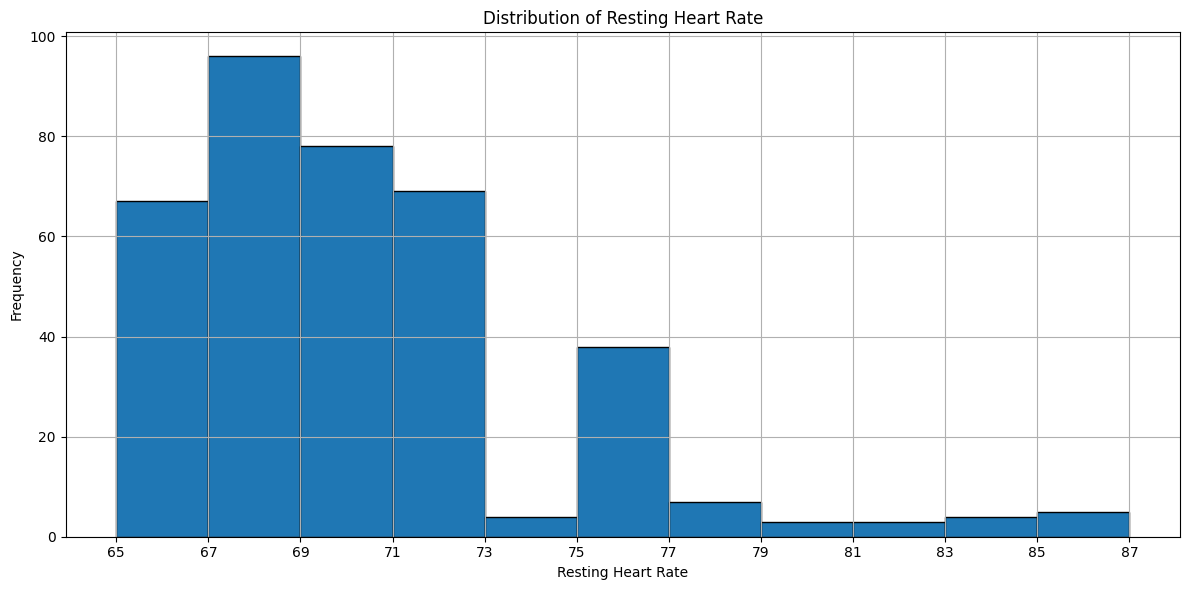

In [ ]:
print(f"The range of Heart Rates is: {df['Heart Rate'].min()}-{df['Heart Rate'].max()}")

# Define bins in increments of 2 for heart rate
bins = np.arange(df['Heart Rate'].min(), df['Heart Rate'].max() + 2, 2)

# Plot histogram
plt.figure(figsize=(12, 6))
plt.hist(df['Heart Rate'], bins=bins, edgecolor='black')
plt.xlabel('Resting Heart Rate')
plt.ylabel('Frequency')
plt.title('Distribution of Resting Heart Rate')
plt.xticks(bins)  # Set x-ticks to align with bins
plt.grid()
plt.tight_layout()

**Daily Steps**

Daily Steps is fairly well dstributed in the second half, from 5000 to 9000, with a drop at the beginning and end. This isn't concerning enough to think that we wouldn't be able to determine a potential relationship though.

The range of Daily Steps values is: 3000-10000


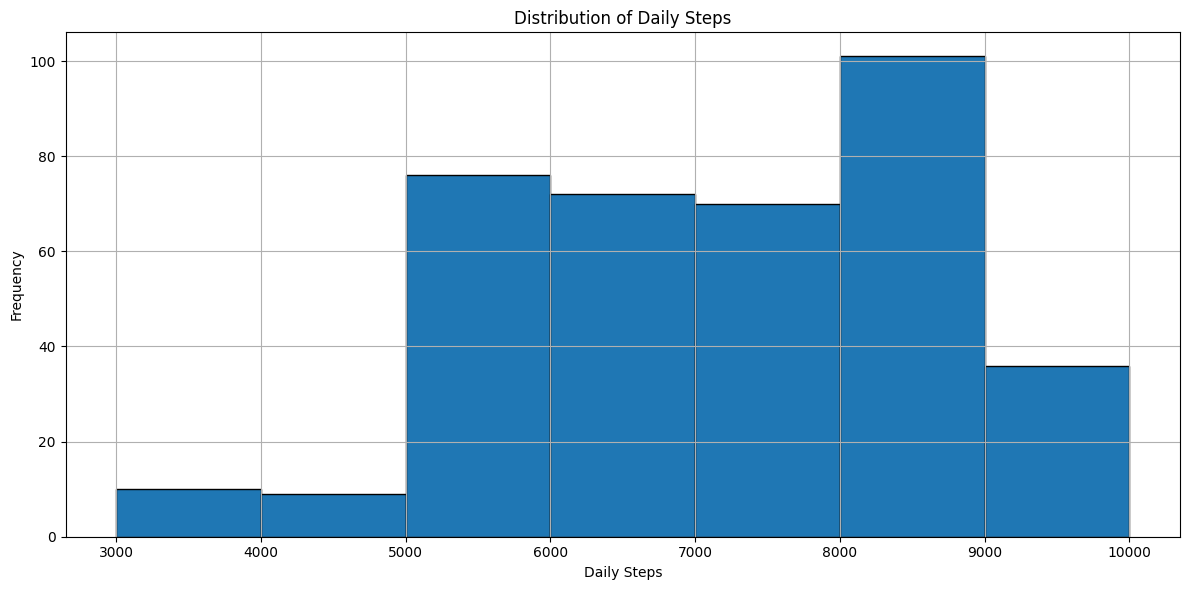

In [ ]:
min_steps = df['Daily Steps'].min()
max_steps = df['Daily Steps'].max()
print(f"The range of Daily Steps values is: {min_steps}-{max_steps}")


# Define bins in increments of 1000 for daily steps
bins = np.arange(df['Daily Steps'].min(), df['Daily Steps'].max() + 1000, 1000)

# Plot histogram
plt.figure(figsize=(12, 6))
plt.hist(df['Daily Steps'], bins=bins, edgecolor='black')
plt.xlabel('Daily Steps')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Steps')
plt.xticks(bins)
plt.grid()
plt.tight_layout()

**Sleep Disorder**

For our Y variable, which represents sleep disorder, we have a perfect distribution of the 2 sleep disorders (sleep apnea and insomnia), with majority of the group not having a disorder at all. This is good because we would want, as can be seen in our set of follow up/sub questions and our main research question, to understand if certain sleep disorders are more correlated with certain variables, and to analyze/comment on these trends.

Note: All NaN values in the Sleep Disorder variable were changed to “No Disorder”, since it was registering as ‘null’ data thus missing data, but we wanted it to correctly reflect that it is another Sleep Disorder category.

In [ ]:
# Start by replacing all of the NaN values in the Sleep Disorder column with "No Disorder"
df['Sleep Disorder'] = df['Sleep Disorder'].fillna("No Disorder")

Value counts:
Sleep Disorder
No Disorder    219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64


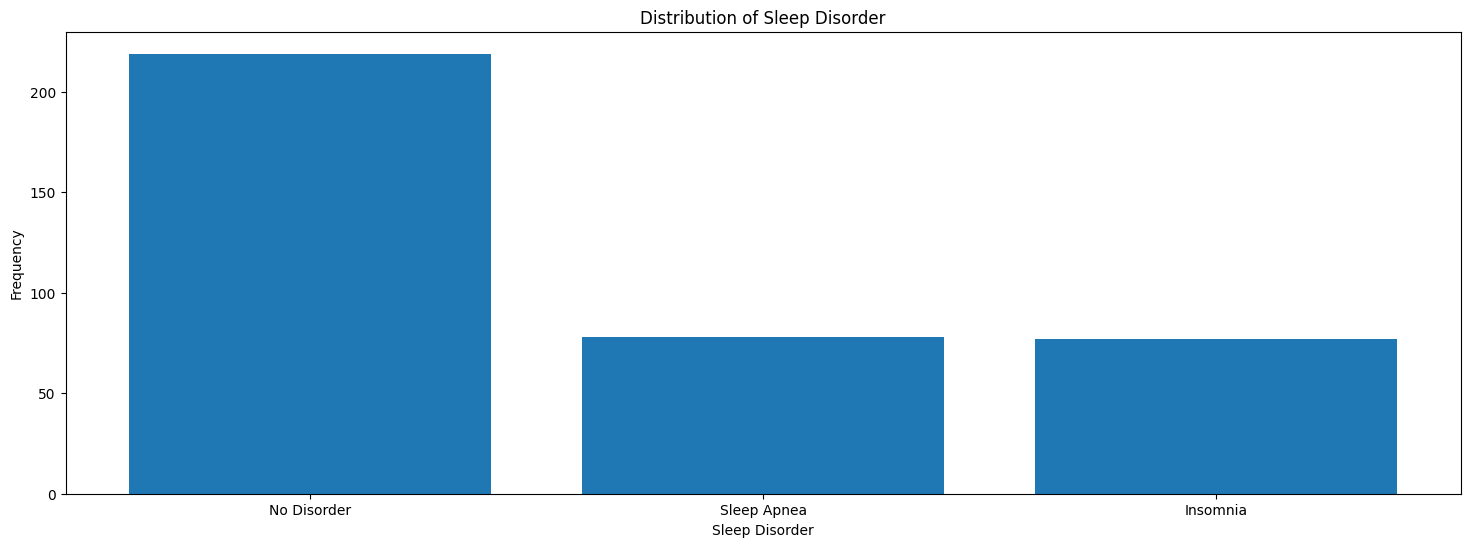

In [ ]:
column_BMI = 'Sleep Disorder'
unique_counts_BMI = df[column_BMI].value_counts()

print("Value counts:")
print(unique_counts_BMI)

plt.figure(figsize=(18,6))
plt.bar(unique_counts_BMI.index, unique_counts_BMI.values)
plt.title(f"Distribution of {column_BMI}")
plt.xlabel(column_BMI)
plt.ylabel("Frequency")
plt.show()

####**Step 5**: Data Scaling

For all of the numerical variables in our dataset (excluding Person ID), we performed standardization (z-score scaling) such that the data for each variable had a mean of 0 and a standard deviation of 1. We did this using the Sklearn StandardScalar and the fit_transform function. This step is important as it improves model performance, avoids bias due to larger-valued features, and enhances interpretability.



In [ ]:
# Initialize the scaler
scaler = StandardScaler()

# Identify numerical columns (typically exclude any binary columns from one-hot encoding)
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Drop Person ID because we don't want to scale that!
numerical_cols = numerical_cols.drop('Person ID')

# Initialize a scaled df
df_scaled = df.copy()

# Fit and transform the scaler on the numerical columns
df_scaled[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display modified dataset
df_scaled.head()


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Age_Group,Sleep_Duration_Groups,systolic,diastolic
0,1,Male,-1.753096,Engineer,-1.298887,-1.098280,-0.825418,0.347021,Overweight,1.654719,-1.619584,No Disorder,25-30,6.0-6.5,-0.330002,-0.268102
1,2,Male,-1.637643,Doctor,-1.173036,-1.098280,0.039844,1.475592,Normal,1.170474,1.970077,No Disorder,25-30,6.0-6.5,-0.459239,-0.755640
2,3,Male,-1.637643,Doctor,-1.173036,-1.098280,0.039844,1.475592,Normal,1.170474,1.970077,No Disorder,25-30,6.0-6.5,-0.459239,-0.755640
3,4,Male,-1.637643,Salesperson,-1.550588,-2.771424,-1.402260,1.475592,Obese,3.591698,-2.362273,Sleep Apnea,25-30,5.5-6.0,1.479309,0.869486
4,5,Male,-1.637643,Salesperson,-1.550588,-2.771424,-1.402260,1.475592,Obese,3.591698,-2.362273,Sleep Apnea,25-30,5.5-6.0,1.479309,0.869486


####**Step 6**: One-Hot Coding

The variables we want to do one-hot coding for are:


*   Gender
*   Occupation
*   BMI Category
*   Sleep Disorder

The purpose of doing this is to convert categorical variables into logical True/False variables prior to analysis so that our machine learning models are able to intepret this.

In [ ]:
# Perform one-hot encoding on the entire dataframe with our specified categories:
df_one_hot = pd.get_dummies(df_scaled, columns=['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder'])

# Convert True/False to 1/0 in all one-hot encoded columns
df_one_hot = df_one_hot.replace({True: 1, False: 0})

# Display the result
df_one_hot.head()

<ipython-input-22-cd8bd6b6ab13>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_one_hot = df_one_hot.replace({True: 1, False: 0})


,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Age_Group,Sleep_Duration_Groups,...,Occupation_Nurse,Occupation_Salesperson,Occupation_Scientist,Occupation_Teacher,BMI Category_Normal,BMI Category_Obese,BMI Category_Overweight,Sleep Disorder_Insomnia,Sleep Disorder_No Disorder,Sleep Disorder_Sleep Apnea
0,1,-1.753096,-1.298887,-1.098280,-0.825418,0.347021,1.654719,-1.619584,25-30,6.0-6.5,...,0,0,0,0,0,0,1,0,1,0
1,2,-1.637643,-1.173036,-1.098280,0.039844,1.475592,1.170474,1.970077,25-30,6.0-6.5,...,0,0,0,0,1,0,0,0,1,0
2,3,-1.637643,-1.173036,-1.098280,0.039844,1.475592,1.170474,1.970077,25-30,6.0-6.5,...,0,0,0,0,1,0,0,0,1,0
3,4,-1.637643,-1.550588,-2.771424,-1.402260,1.475592,3.591698,-2.362273,25-30,5.5-6.0,...,0,1,0,0,0,1,0,0,0,1
4,5,-1.637643,-1.550588,-2.771424,-1.402260,1.475592,3.591698,-2.362273,25-30,5.5-6.0,...,0,1,0,0,0,1,0,0,0,1


## Milestone 3 Progress


---



#### **Step 1**: Summary of Data

*Start by looking at all of the features in the dataset and producing an overview histogram with all of the variables (Imbalance was discussed above in Step 4 of Milestone 2). As a quick recap please find below (as the markdown notes for each diagram indicated):*


We found that many variables were adequately balanced such that they would not impact conclusions from our data analysis. Gender is very well balanced (189 male individuals and 185 female individuals). We found that the individual Age ranged from 27-59 and were approximately normally distributed with a mean age of 42.2 years. Sleep Duration ranged from 5.8 to 8.5 hours and was adequately balanced. The Physical Activity Level rating distribution was approximately uniform, however there was a significantly lower number of ratings between 50-60 and 80-90 (only 10 or less occurrences versus 70-80 in all other bins). The distribution of Stress Level was roughly uniform.
Other variables had noticeable imbalances worth noting and keeping in mind as we develop research questions and strategies to answer them. Sleep Quality ranged from 4-9 and was significantly skewed towards higher ratings. This is something to keep in mind when we start to ask and answer questions about our dataset, as our data may be more representative of high-quality sleep. (So for example, if we are looking into suggestions for better lifestyle choices that improve sleep quality, this data could use a random resample as we would want to show impact of/on the respective lower sleep scores.) The BMI Category variable was also significantly imbalanced with 216 “Normal”, 148 “Overweight”, and only 10 “Obese” individuals. This may indicate that our findings do not hold true for obese individuals. The vast majority of resting Heart Rate values were between 65 and 73, but the range of values spanned from 65-86 bpm. Similarly, the vast majority of Daily Steps were above 5000, but the range of values spanned from 3000-10000.



##### **Histograms & Count Plots**



*Note: This is similar to the analysis done above, but we wanted to expand a bit more for extended visual analysis. These also allow all the variables to be side by side, to understand the shape of the data, and see descriptive statistics all in one place.*

Shape of the data: (374, 16)

Data Types:
Person ID                     int64
Gender                       object
Age                           int64
Occupation                   object
Sleep Duration              float64
Quality of Sleep              int64
Physical Activity Level       int64
Stress Level                  int64
BMI Category                 object
Heart Rate                    int64
Daily Steps                   int64
Sleep Disorder               object
Age_Group                  category
Sleep_Duration_Groups      category
systolic                      int64
diastolic                     int64
dtype: object

Descriptive Statistics:
         Person ID Gender         Age Occupation  Sleep Duration  \
count   374.000000    374  374.000000        374      374.000000   
unique         NaN      2         NaN          9             NaN   
top            NaN   Male         NaN      Nurse             NaN   
freq           NaN    189         NaN         73             NaN   
mea

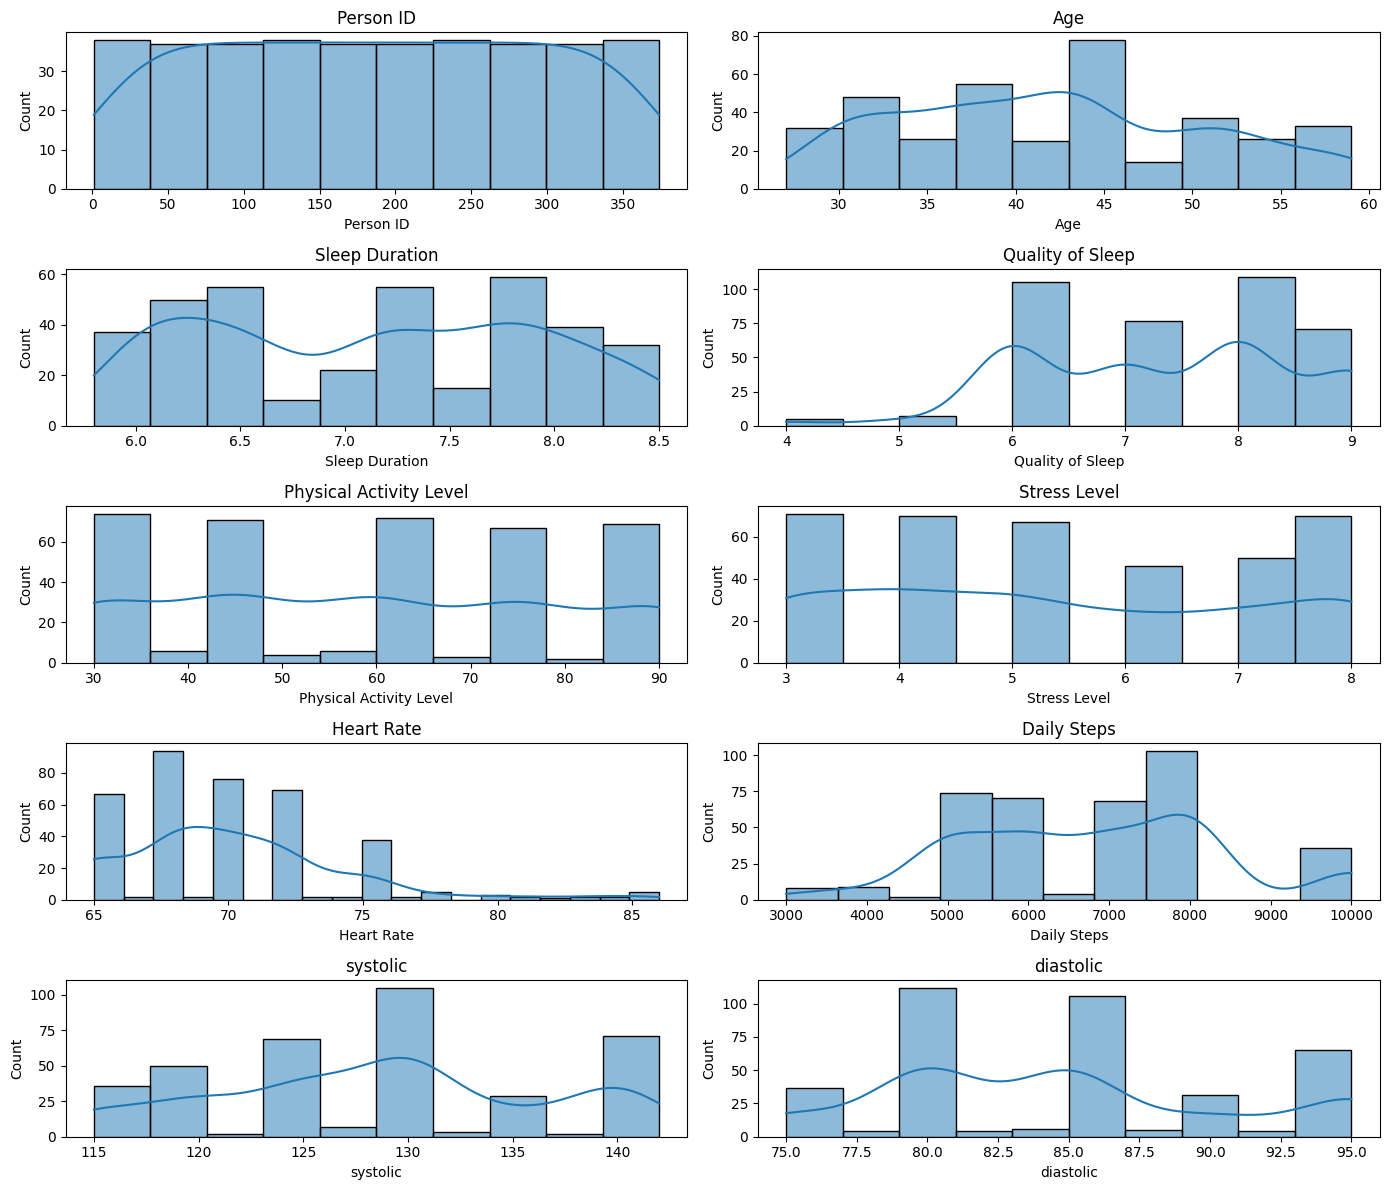

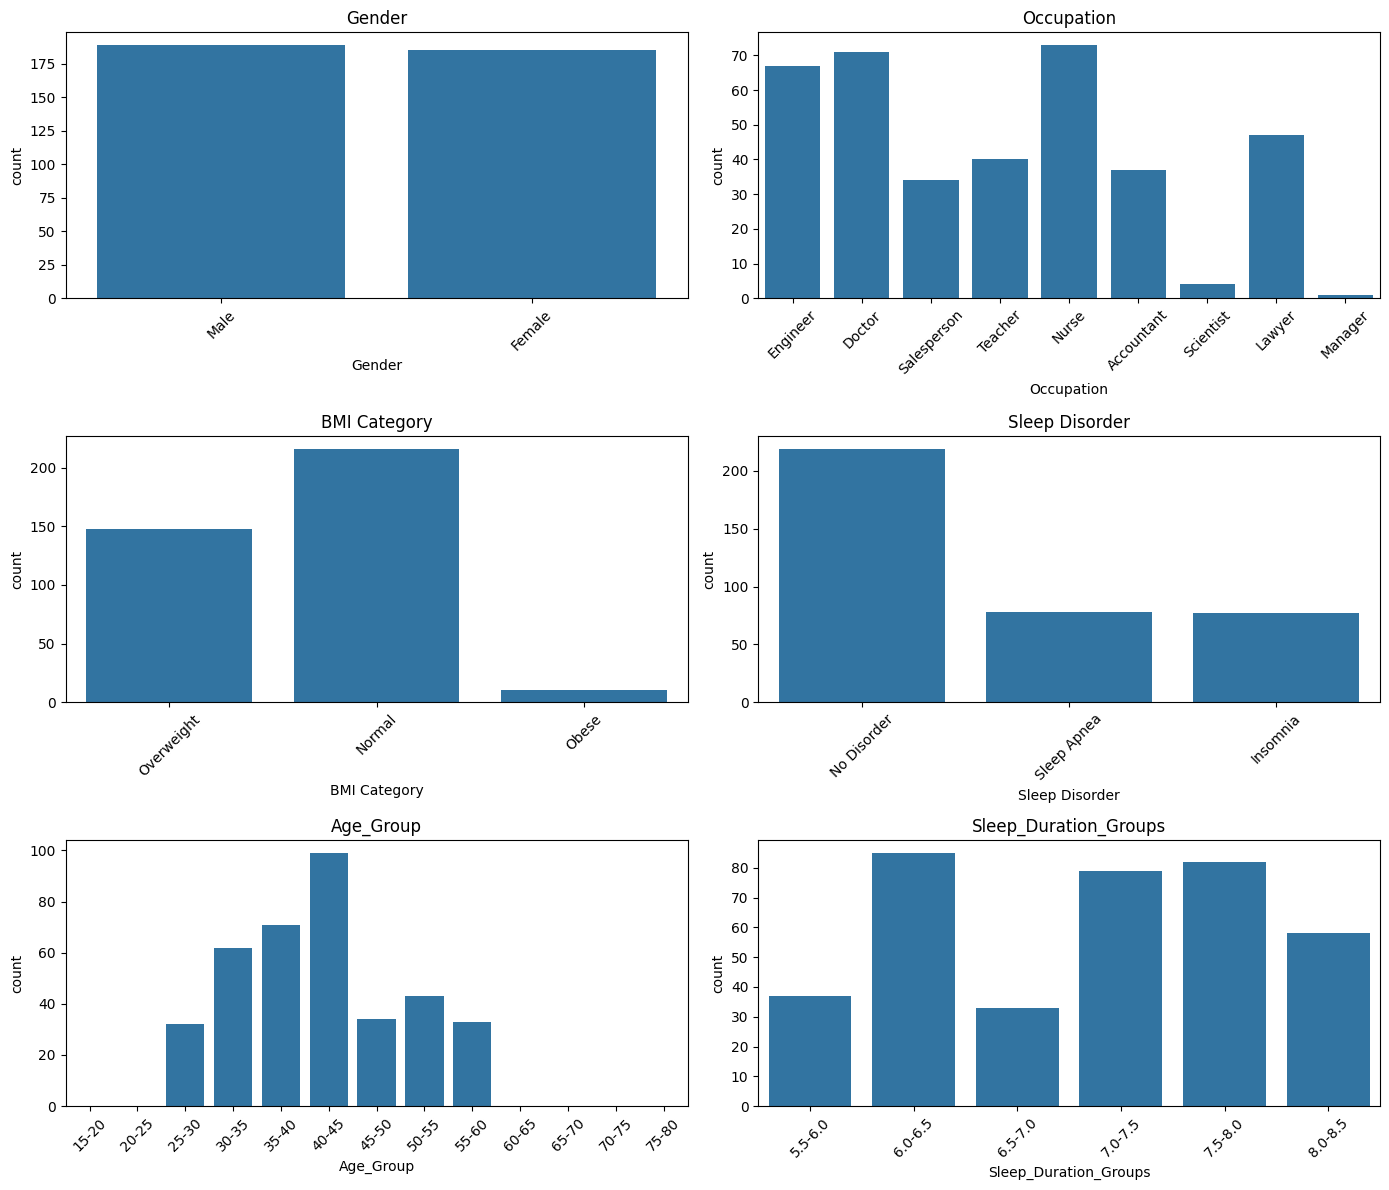

In [ ]:
# Summary of the Data
print("Shape of the data:", df.shape)
print("\nData Types:")
print(df.dtypes)
print("\nDescriptive Statistics:")
print(df.describe(include='all'))

# Summary of Features
print("\nSummary of Features:")

# Histograms
plt.figure(figsize=(14, 12))
for i, col in enumerate(df.select_dtypes(include=['number']).columns):
    plt.subplot(5, 2, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

# Count Plots for Categorical Features
plt.figure(figsize=(14, 12))
categorical_columns = df.select_dtypes(include=['object', 'category', 'bool']).columns

for i, col in enumerate(categorical_columns):
    plt.subplot(3, 2, i + 1)
    sns.countplot(data=df, x=col)
    plt.title(col)
    plt.xticks(rotation=45)  # Rotate x-axis labels for readability if needed
plt.tight_layout()
plt.show()

##### **Correlation Plots**

*This heat map only shows the correlation between the features and the three different sleep disorder variables*

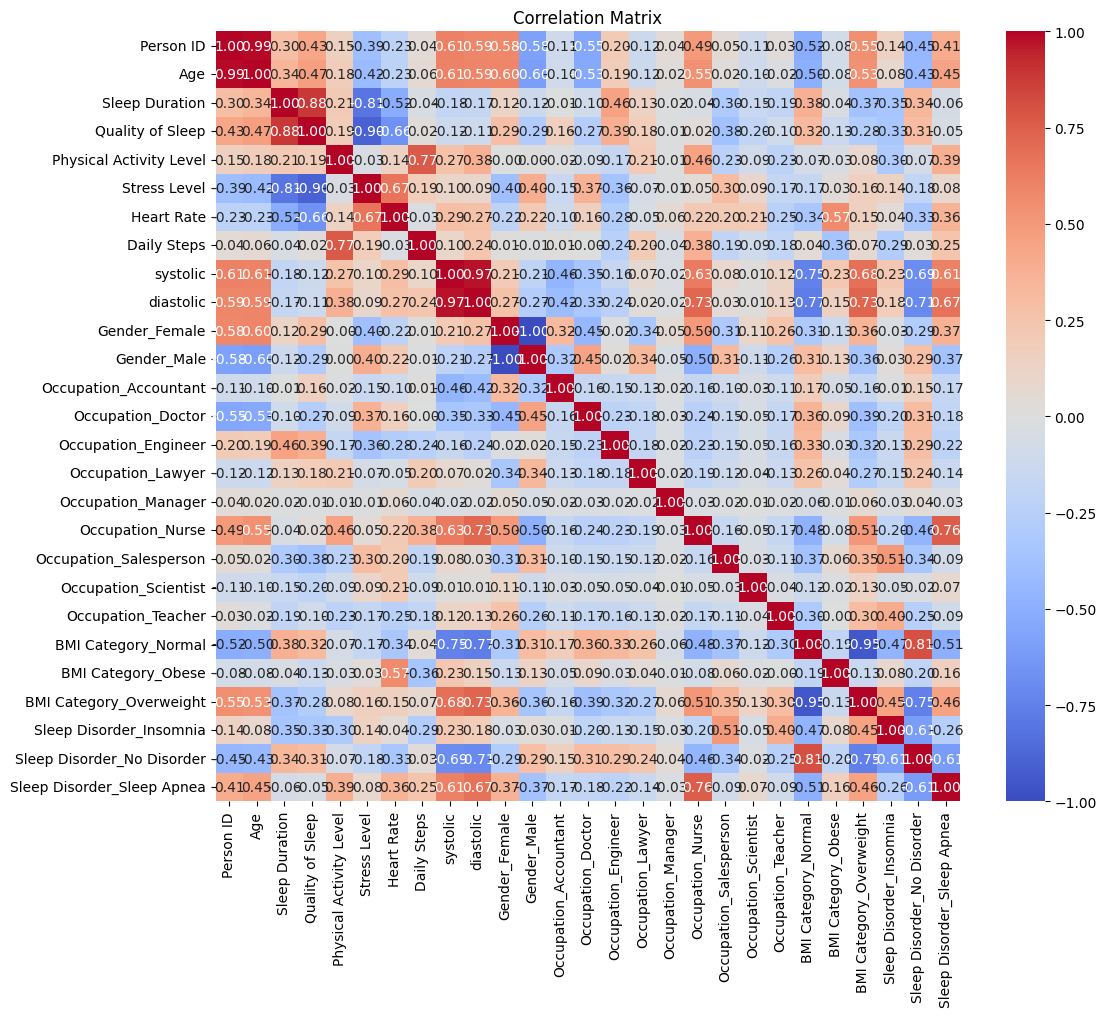

In [ ]:
# Select only numeric features for correlation calculation
df_numeric = df_one_hot.select_dtypes(include=['number'])
plt.figure(figsize=(12, 10))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f") # Calculate correlation on numeric_df
plt.title("Correlation Matrix")
plt.show()


Below we can observe that the sleep disorder insomnia is relatively strongly correlated with the following features:  occupation_salesperson (0.51), occupation_teacher (0.40), and BMI Category_Overweight (0.45). In contrast, sleep apnea shows a strong correlation with the following: occupation_nurse (0.76), BMI Category_Overweight (0.46), systolic (0.61), diastolic (0.67). There are also many other features that also have a lesser correlation (<0.4) with different sleep disorder statuses that are worth further investigation.

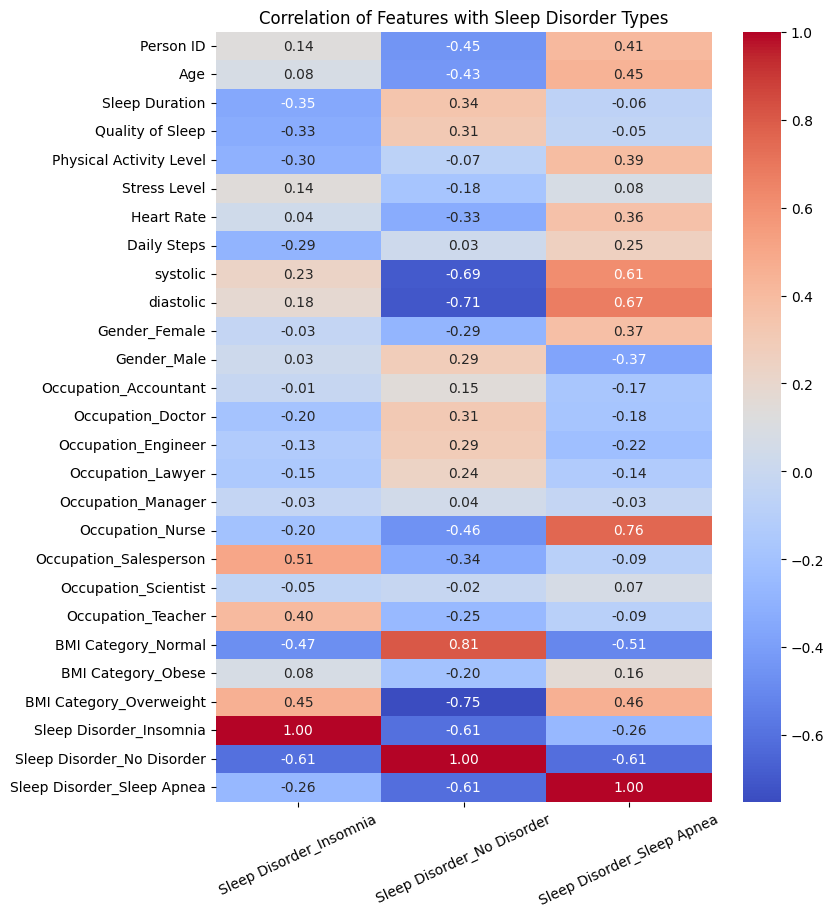

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

# Select only correlations with the sleep disorder variables
sleep_disorder_corr = correlation_matrix[['Sleep Disorder_Insomnia', 'Sleep Disorder_No Disorder', 'Sleep Disorder_Sleep Apnea']]

# Plot the filtered correlation matrix
plt.figure(figsize=(8, 10))
sns.heatmap(sleep_disorder_corr, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Correlation of Features with Sleep Disorder Types")
plt.xticks(rotation=25)
plt.show()

##### Clustering

*In this section, we performed kMeans clustering to divide the data into three groups (attempting to divide the data based on Insomnia, Sleep Apnea, and having No Disorder)*


In [ ]:
# We will use only the numeric data with the 3 disorders removed
df_clustering = df_numeric.drop(['Sleep Disorder_Insomnia', 'Sleep Disorder_No Disorder', 'Sleep Disorder_Sleep Apnea'], axis = 1)

# Initialize and fit KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0)
df_one_hot['Cluster'] = kmeans.fit_predict(df_clustering)

# Check the distribution of sleep disorders in each cluster
cluster_summary = df_one_hot.groupby('Cluster')[['Sleep Disorder_Insomnia', 'Sleep Disorder_No Disorder', 'Sleep Disorder_Sleep Apnea']].mean()

# Print the distribution that exists in each cluster:
print(cluster_summary)

         Sleep Disorder_Insomnia  Sleep Disorder_No Disorder  \
Cluster                                                        
0                       0.395161                    0.556452   
1                       0.055556                    0.857143   
2                       0.169355                    0.338710   

         Sleep Disorder_Sleep Apnea  
Cluster                              
0                          0.048387  
1                          0.087302  
2                          0.491935  


Below we can see the results of k Means clustering with three clusters, each meant to represent a different sleep disorder status. We can see that cluster 1 best represents Sleep Disorder_No Disorder. Cluster 0 best represents Sleep Disorder_Insomnia (as we attributed Sleep Disorder_No Disorder to cluster 1) and cluster 2 best represents Sleep Disorder_Sleep Apnea.

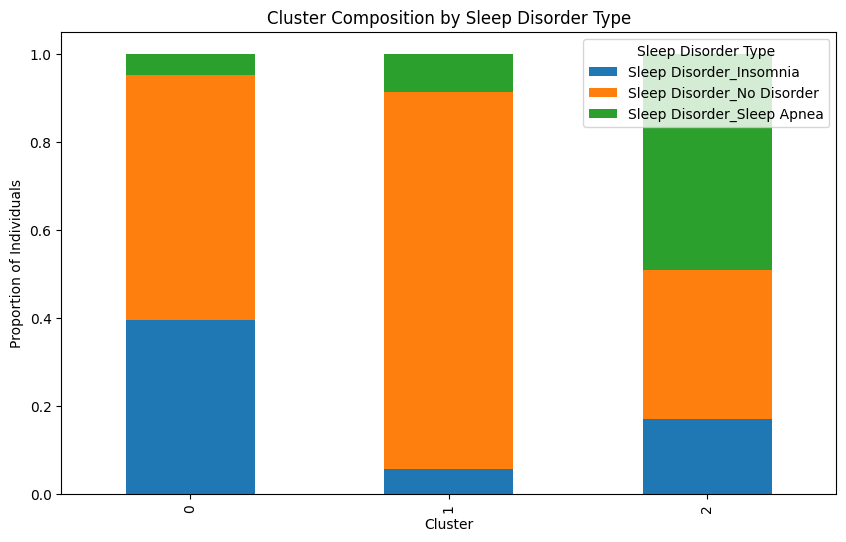

In [ ]:
# Plot stacked bar chart (to visualize the distribution of each cluster)
cluster_summary.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Cluster Composition by Sleep Disorder Type')
plt.xlabel('Cluster')
plt.ylabel('Proportion of Individuals')
plt.legend(title='Sleep Disorder Type')
plt.show()

#### **Step 2**: Deeper Understanding of the Data


Since a few of these variables are categorical, we have added visuals below to analyze the patterns + outliers of these predictors


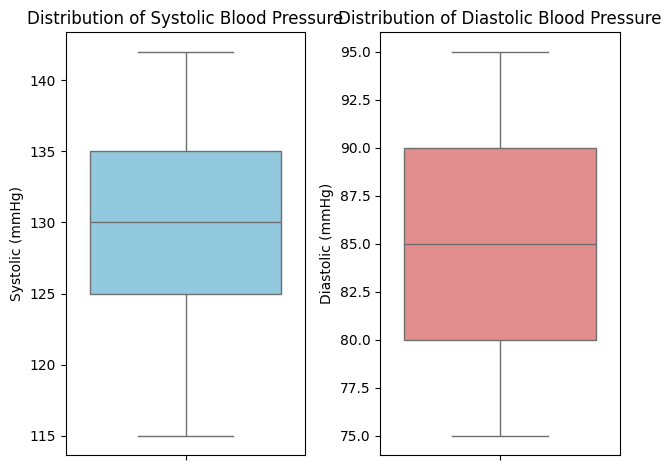

In [ ]:
#To plot the trends in blood pressure, we would want to first separate the systolic and diastolic values

# Split the 'blood_pressure' column into 'systolic' and 'diastolic'
#df[['systolic', 'diastolic']] = df['Blood Pressure'].str.split('/', expand=True)

# Convert to numeric values
df['systolic'] = pd.to_numeric(df['systolic'])
df['diastolic'] = pd.to_numeric(df['diastolic'])

# Box plot for Systolic
plt.subplot(1, 2, 1)
sns.boxplot(y='systolic', data=df, color='skyblue')
plt.title("Distribution of Systolic Blood Pressure")
plt.ylabel("Systolic (mmHg)")

# Box plot for Diastolic
plt.subplot(1, 2, 2)
sns.boxplot(y='diastolic', data=df, color='lightcoral')
plt.title("Distribution of Diastolic Blood Pressure")
plt.ylabel("Diastolic (mmHg)")

plt.tight_layout()
plt.show()


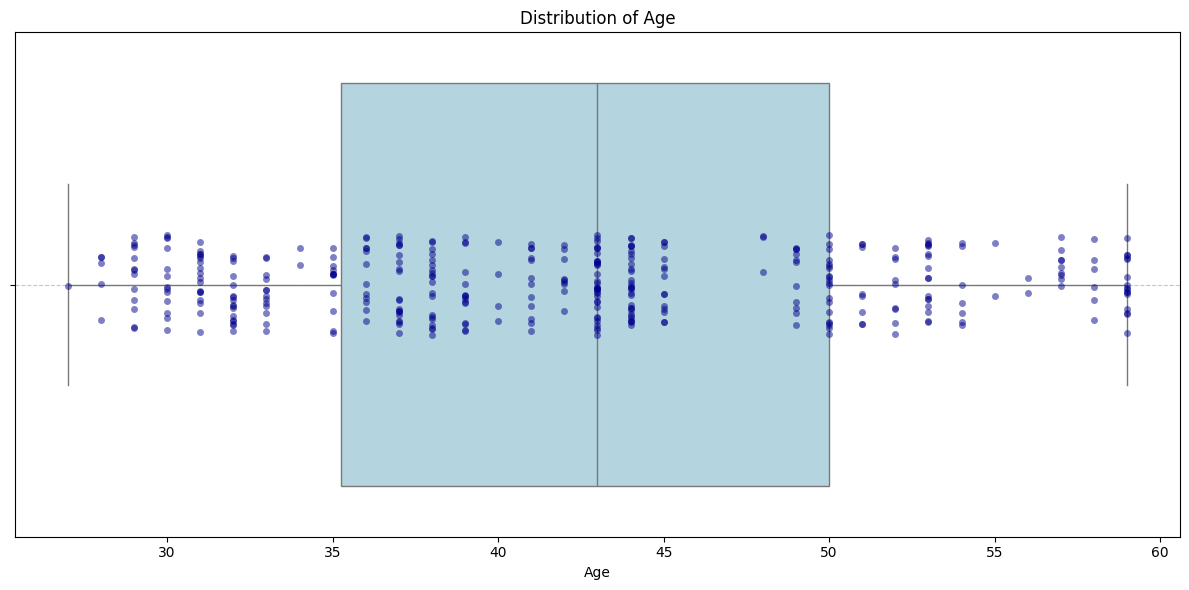

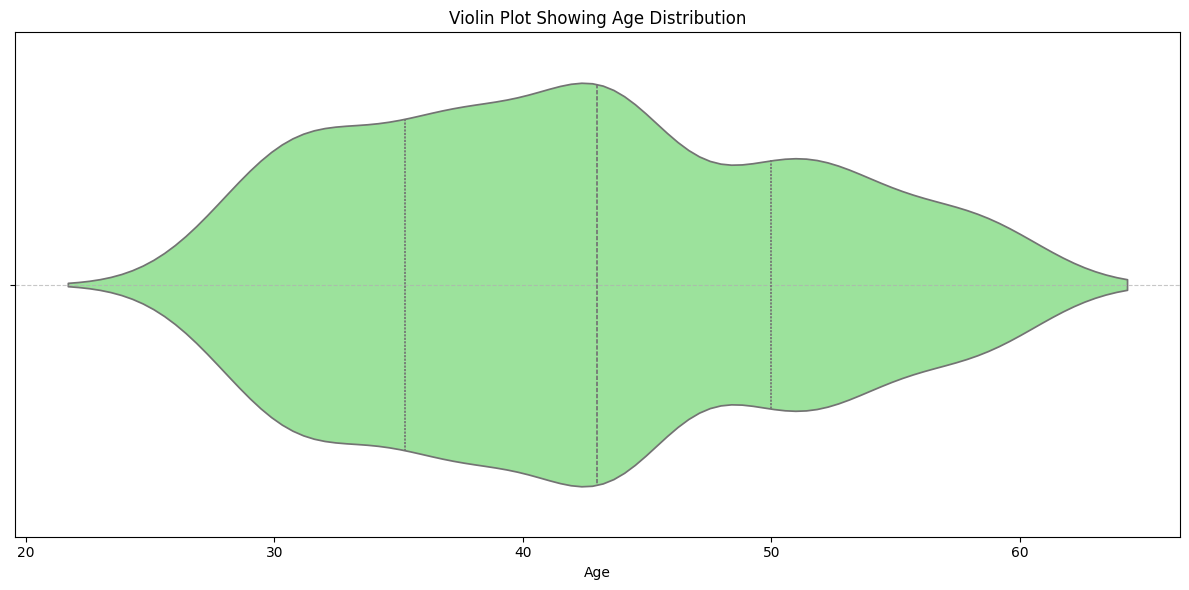

In [ ]:
plt.figure(figsize=(12, 6))

# Box plot for 'Age' with individual data points
sns.boxplot(x='Age', data=df, color='lightblue', fliersize=0)  # fliersize=0 hides the default outlier markers
sns.stripplot(x='Age', data=df, color='darkblue', alpha=0.5, jitter=True)  # Adds jittered points

plt.title("Distribution of Age")
plt.xlabel("Age")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Alternative: Violin plot to show distribution and outliers
plt.figure(figsize=(12, 6))
sns.violinplot(x='Age', data=df, color='lightgreen', inner='quartile')  # 'inner' shows quartiles within the distribution
plt.title("Violin Plot Showing Age Distribution")
plt.xlabel("Age")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


<ipython-input-30-334e492e4cc6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Age', data=df, palette='pastel')


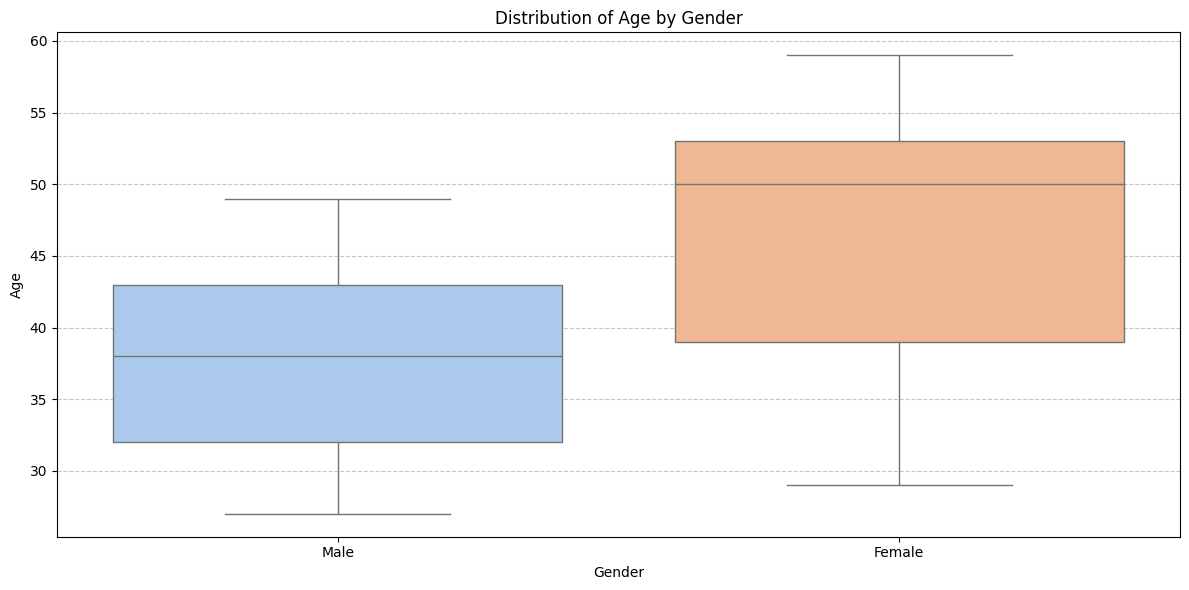

<ipython-input-30-334e492e4cc6>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Gender', y='Age', data=df, palette='pastel', inner='quartile')


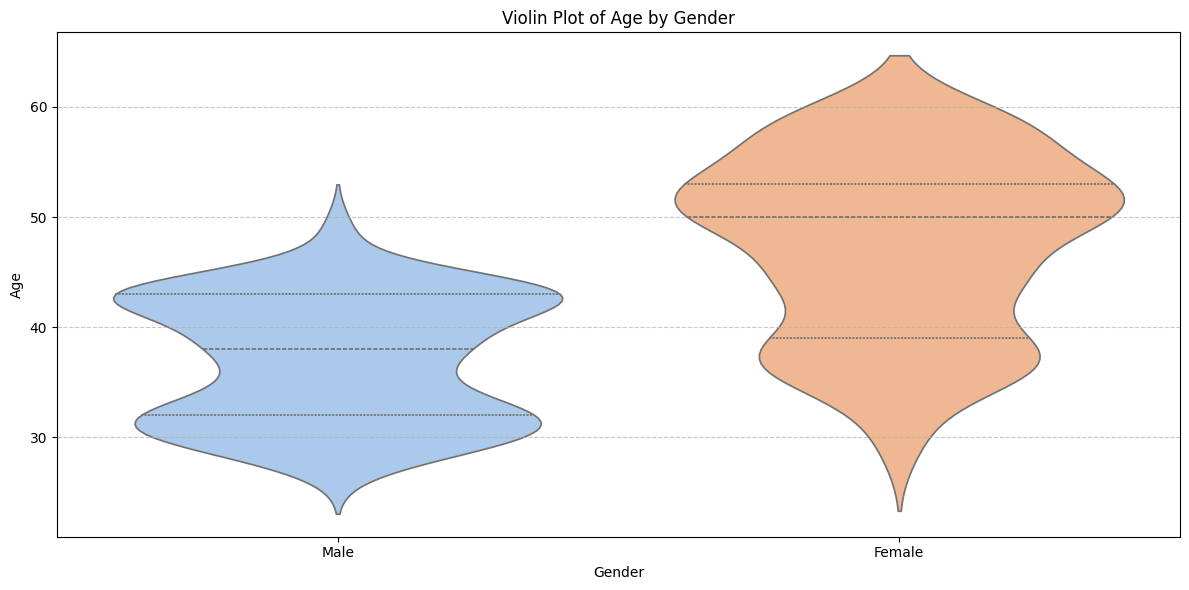

In [ ]:
plt.figure(figsize=(12, 6))

# Box plot of 'Age' by 'Gender'
sns.boxplot(x='Gender', y='Age', data=df, palette='pastel')
plt.title("Distribution of Age by Gender")
plt.xlabel("Gender")
plt.ylabel("Age")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Optional: Violin plot for more detail
plt.figure(figsize=(12, 6))
sns.violinplot(x='Gender', y='Age', data=df, palette='pastel', inner='quartile')
plt.title("Violin Plot of Age by Gender")
plt.xlabel("Gender")
plt.ylabel("Age")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


<ipython-input-31-c9bf13d72792>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Occupation', y='Age', data=df, palette='pastel')


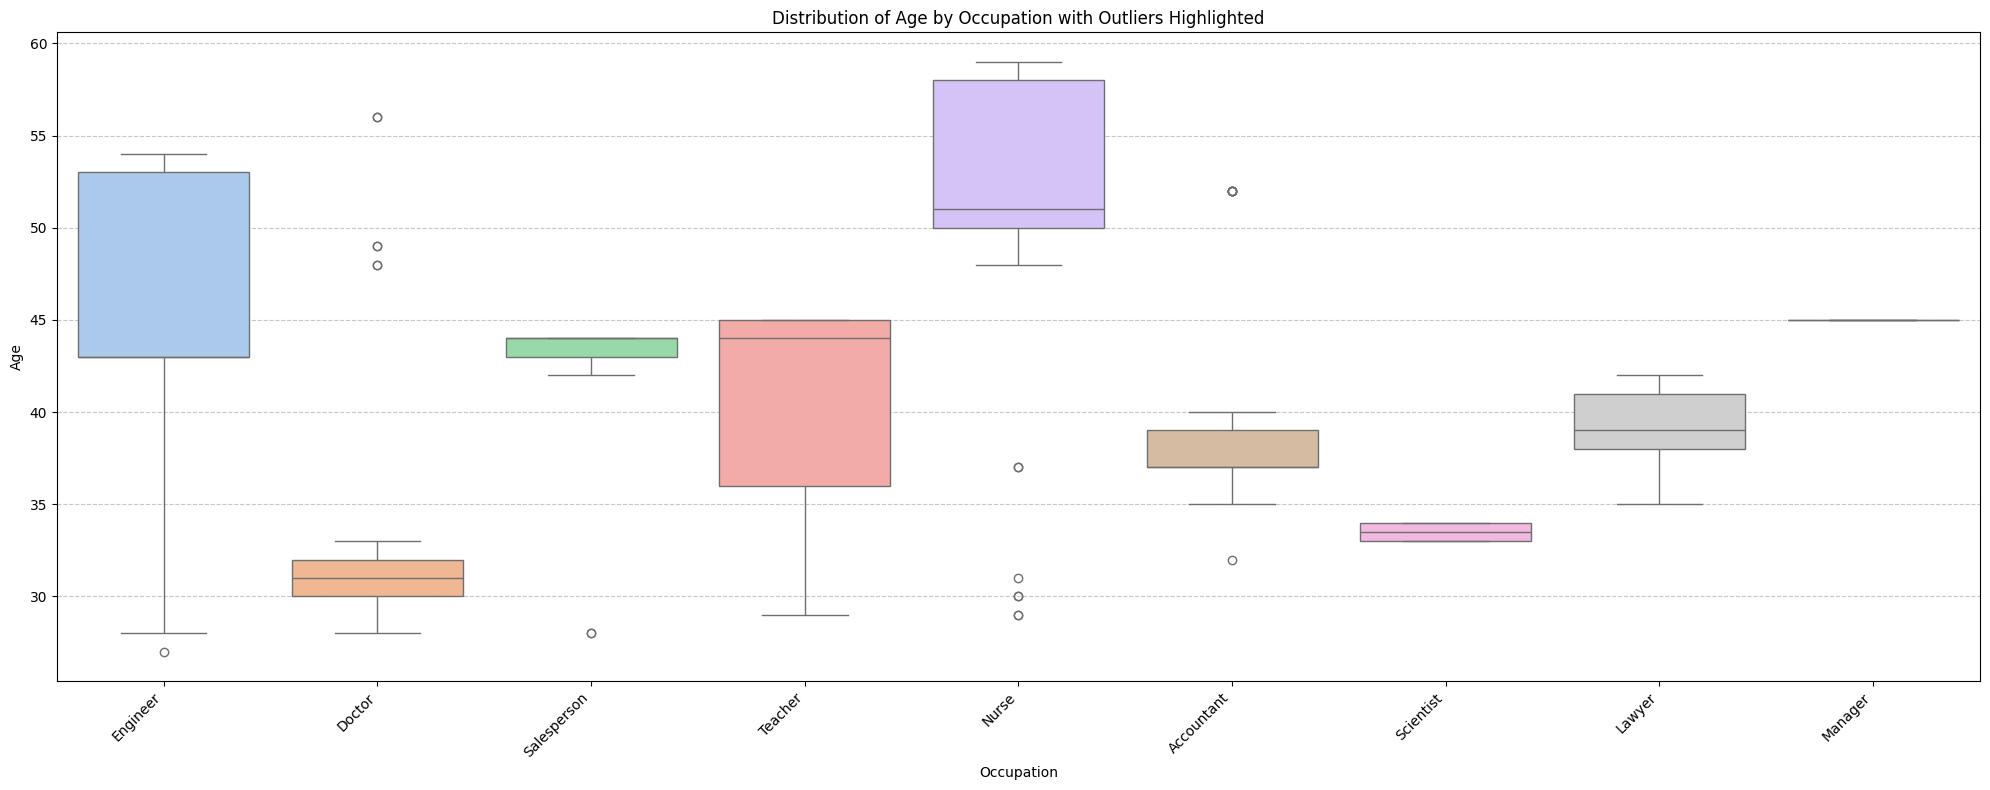

<ipython-input-31-c9bf13d72792>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Occupation', y='Age', data=df, jitter=True, palette='pastel', alpha=0.7)


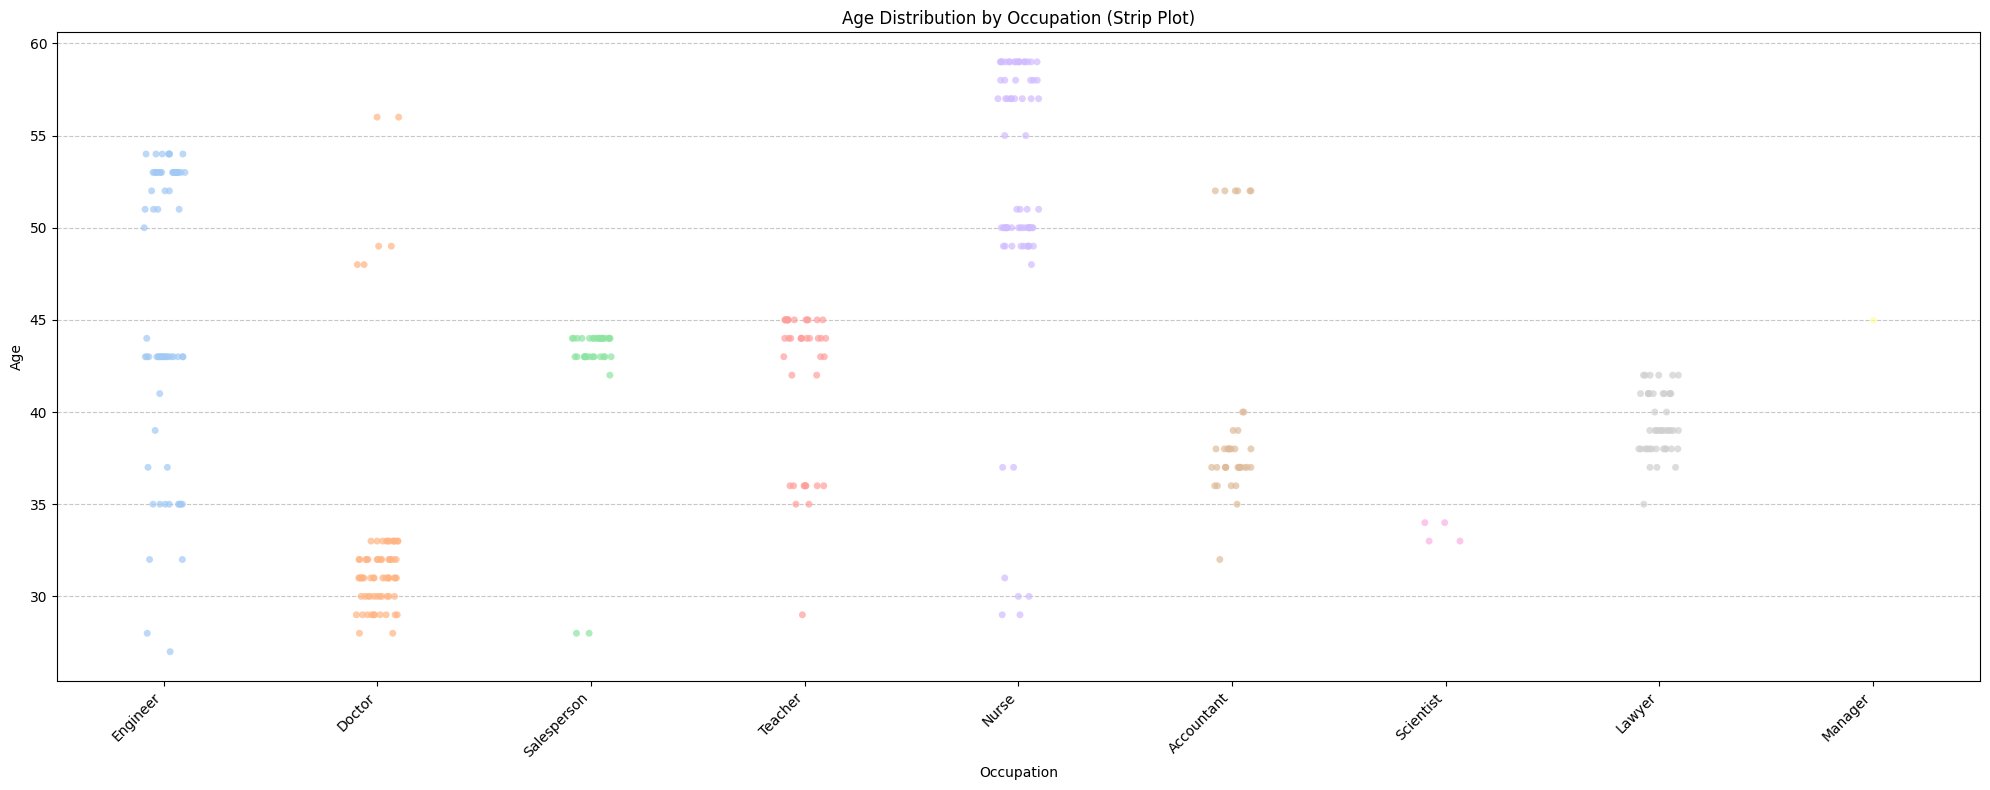

In [ ]:
# Example: Box plot showing 'Age' distribution by 'Occupation'
plt.figure(figsize=(20, 8))
sns.boxplot(x='Occupation', y='Age', data=df, palette='pastel')
plt.title("Distribution of Age by Occupation with Outliers Highlighted")
plt.xlabel("Occupation")
plt.ylabel("Age")
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Optional: Strip Plot for more granular detail
plt.figure(figsize=(20, 8))
sns.stripplot(x='Occupation', y='Age', data=df, jitter=True, palette='pastel', alpha=0.7)
plt.title("Age Distribution by Occupation (Strip Plot)")
plt.xlabel("Occupation")
plt.ylabel("Age")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Now that we have extensive visualizations, let's calculate p values to see how significant the predictors are to our chosen Y = quality of sleep (based on our research question we have selected.)

*Note: We have already shown a heatmap, but we would like extensive numeric analysis here.*

 Our team noticed that by observing the p-values and correlation coefficients of both Sleep Disorder- Insomnia and Sleep Disorder-Apnea, we are able to gather which variables affect each one respectively the most (and thus delving into our research question of understanding which variables impact each sleep disorder respectively.) For Sleep Disorder-Insomnia, we see that the top 7 significant predictors are: systolic, diastolic, occupation (namely salesperson), sleep duration, physical activity level, BMI = overweight, and daily steps. On the other hand for Sleep Apnea, they are: diastolic, systolic, occupation (specifically nurse), gender = female, physical activity level, BMI = overweight, and heart rate. The surprising predictors here are the occupation type that differs, but the overlap of many factors such as BMI and physical activity level is in line to what our hypothesis was.


In [ ]:
from scipy.stats import pearsonr

# List of variables to check correlation with 'Quality of Sleep'
variables = ['Age', 'systolic', 'diastolic', 'Gender_Female', 'Gender_Male',
             'Occupation_Accountant', 'Occupation_Doctor', 'Occupation_Engineer',
             'Occupation_Lawyer', 'Occupation_Manager', 'Occupation_Nurse',
             'Occupation_Sales Representative', 'Occupation_Salesperson',
             'Occupation_Scientist', 'Occupation_Software Engineer', 'Occupation_Teacher',
             'Sleep Duration', 'Physical Activity Level', 'Stress Level',
             'BMI Category_Normal', 'BMI Category_Normal Weight', 'BMI Category_Obese',
             'BMI Category_Overweight', 'Blood Pressure', 'Heart Rate',
             'Daily Steps', 'Sleep Disorder_Insomnia', 'Sleep Disorder_Sleep Apnea']

# Create an empty list to store results
results = []

# Iterate over the variables and calculate correlation and p-value
for var in variables:
    if var in df_one_hot.columns:
        # Check if the column is numeric
        if pd.api.types.is_numeric_dtype(df_one_hot[var]) and pd.api.types.is_numeric_dtype(df_one_hot['Quality of Sleep']):
            corr_coefficient, p_value = pearsonr(df_one_hot[var], df_one_hot['Quality of Sleep'])
            results.append({'Variable': var, 'Correlation Coefficient': corr_coefficient, 'P-value': p_value})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Sort by p-value in ascending order
sorted_results_df = results_df.sort_values(by='P-value').head(5)

# Display the top 5 predictors for 'Quality of Sleep' in a table format
print("\nTop 5 Predictors for 'Quality of Sleep':")
print(sorted_results_df.to_string(index=False, float_format="{:.4f}".format))



Top 5 Predictors for 'Quality of Sleep':
           Variable  Correlation Coefficient  P-value
       Stress Level                  -0.8988   0.0000
     Sleep Duration                   0.8832   0.0000
         Heart Rate                  -0.6599   0.0000
                Age                   0.4737   0.0000
Occupation_Engineer                   0.3852   0.0000


In [ ]:
# Identify non-numeric columns
non_numeric_cols = df_one_hot.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)


Non-numeric columns: Index([], dtype='object')


**Confounding Variables:**
One of the other key components of thoroughly understanding the data was looking at potential confounding variables. For Insomnia and sleep apnea, one can see in the output above that the following variables are potential cofounders: systolic, occupation_nurse, physical activity level, BMI = normal and overweight, and daily steps. This dual correlation could indicate they influence or confound the relationships between the two disorders and other predictors. However, the strength of correlation differs per disorder (for ex: occupation nurse has 0.76 with apnea vs 0.2 with insomnia, which is consistent with what we found in the p-values.) The one surprising element here is that occupation-nurse could be confounding but occupation-salesperson isn’t, which differs from the significant p value. These findings show that certain lifestyle and health metrics are potentially confounding and could impact the relationship between predictors and sleep disorders. This would make it harder to isolate the impact of one disorder without controlling for the cofounders.



Potential confounding variables for 'Sleep Disorder_Insomnia':
  systolic: Correlation with 'Sleep Disorder_Insomnia' = 0.23, Correlation with other disorder = 0.61
  Occupation_Nurse: Correlation with 'Sleep Disorder_Insomnia' = 0.20, Correlation with other disorder = 0.76
  Physical Activity Level: Correlation with 'Sleep Disorder_Insomnia' = 0.30, Correlation with other disorder = 0.39
  BMI Category_Normal: Correlation with 'Sleep Disorder_Insomnia' = 0.47, Correlation with other disorder = 0.51
  BMI Category_Overweight: Correlation with 'Sleep Disorder_Insomnia' = 0.45, Correlation with other disorder = 0.46
  Daily Steps: Correlation with 'Sleep Disorder_Insomnia' = 0.29, Correlation with other disorder = 0.25
  Sleep Disorder_Sleep Apnea: Correlation with 'Sleep Disorder_Insomnia' = 0.26, Correlation with other disorder = 1.00

Potential confounding variables for 'Sleep Disorder_Sleep Apnea':
  systolic: Correlation with 'Sleep Disorder_Sleep Apnea' = 0.61, Correlation with ot

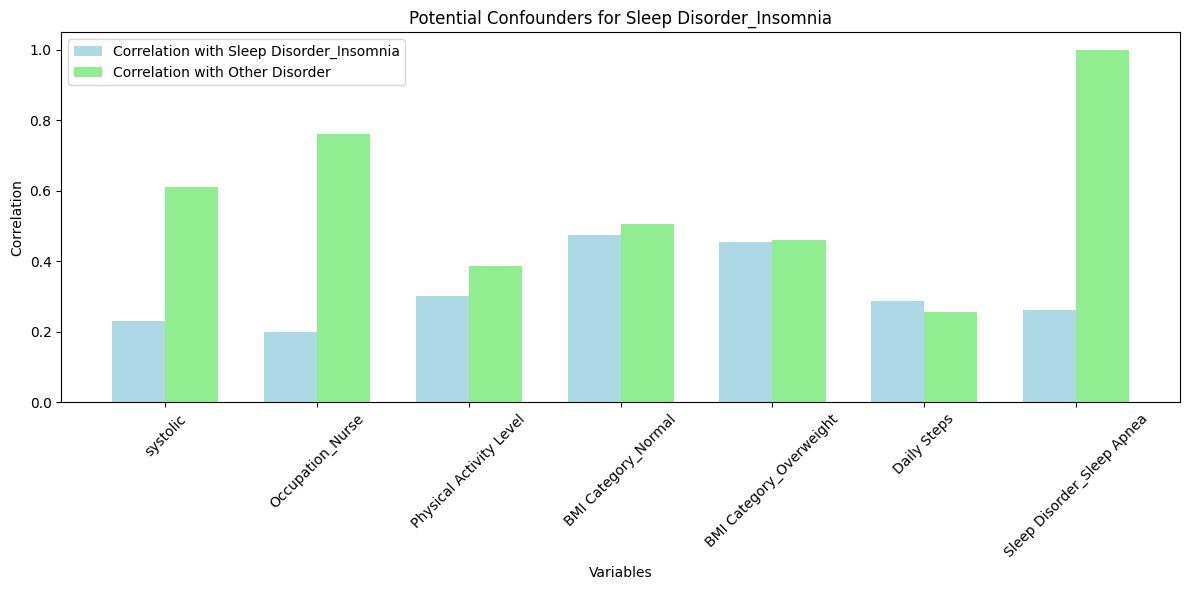

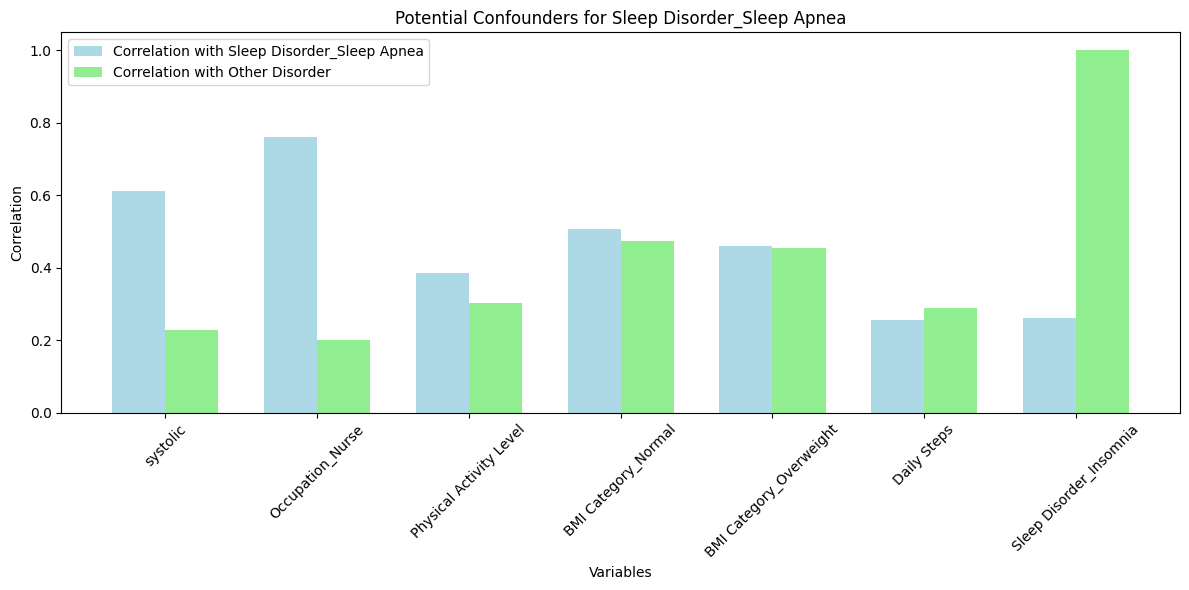

In [ ]:
# Variables to check for confounders specifically for the two sleep disorders
disorders_of_interest = ['Sleep Disorder_Insomnia', 'Sleep Disorder_Sleep Apnea']

# Identify potential confounders for each sleep disorder
confounders_dict = {}

for disorder in disorders_of_interest:
    potential_confounders = []
    if disorder in df_one_hot.columns:
        for var in variables:
            if var != disorder and var in df_one_hot.columns:
                corr_with_disorder = abs(correlation_matrix[disorder][var])
                for other_disorder in disorders_of_interest:
                    if other_disorder != disorder:
                        corr_with_other_disorder = abs(correlation_matrix[other_disorder][var])
                        if corr_with_disorder > 0.2 and corr_with_other_disorder > 0.2:  # Threshold for potential significance
                            potential_confounders.append((var, corr_with_disorder, corr_with_other_disorder))
        confounders_dict[disorder] = potential_confounders

# Print out potential confounders for each sleep disorder with correlation values
for disorder, confounders in confounders_dict.items():
    print(f"\nPotential confounding variables for '{disorder}':")
    if confounders:
        for var, corr_disorder, corr_other_disorder in confounders:
            print(f"  {var}: Correlation with '{disorder}' = {corr_disorder:.2f}, Correlation with other disorder = {corr_other_disorder:.2f}")
    else:
        print("  None found")

# Visualize potential confounders using bar plots for each sleep disorder
for disorder, confounders in confounders_dict.items():
    if confounders:
        confounder_names = [x[0] for x in confounders]
        corr_with_disorder_values = [x[1] for x in confounders]
        corr_with_other_disorder_values = [x[2] for x in confounders]

        # Create a bar plot for better visualization
        plt.figure(figsize=(12, 6))
        bar_width = 0.35
        index = np.arange(len(confounder_names))

        plt.bar(index, corr_with_disorder_values, bar_width, label=f'Correlation with {disorder}', color='lightblue')
        plt.bar(index + bar_width, corr_with_other_disorder_values, bar_width, label='Correlation with Other Disorder', color='lightgreen')

        plt.xlabel('Variables')
        plt.ylabel('Correlation')
        plt.title(f'Potential Confounders for {disorder}')
        plt.xticks(index + bar_width / 2, confounder_names, rotation=45)
        plt.legend()
        plt.tight_layout()
        plt.show()


### **Step 3**: Meaningful Insights

Analysis of Sleep Duration: The distribution is relatively even, suggesting no immediately obvious sleep duration outliers or patterns.

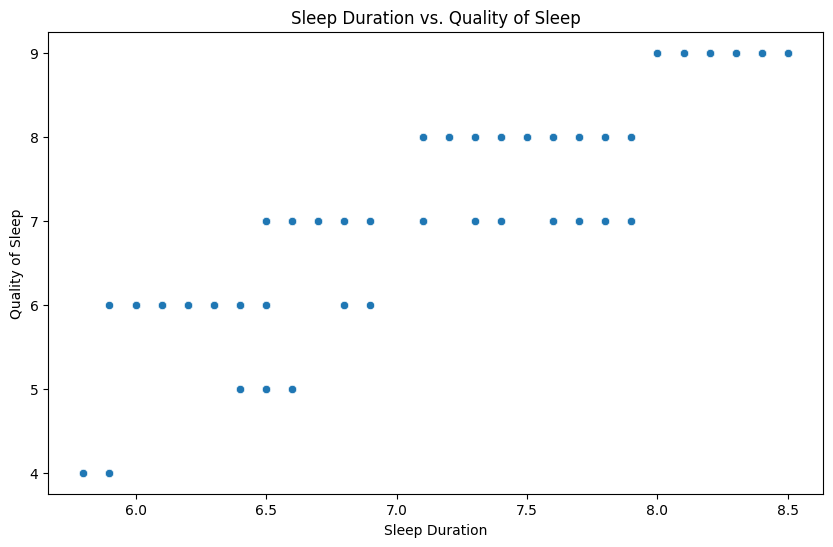

Correlation coefficient: 0.88
P-value: 0.000


In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sleep Duration', y='Quality of Sleep', data=df)
plt.title('Sleep Duration vs. Quality of Sleep')
plt.xlabel('Sleep Duration')
plt.ylabel('Quality of Sleep')
plt.show()

# Calculate the correlation between 'Sleep Duration' and 'Quality of Sleep'
correlation, p_value = pearsonr(df['Sleep Duration'], df['Quality of Sleep'])
print(f"Correlation coefficient: {correlation:.2f}")
print(f"P-value: {p_value:.3f}")

Analysis of Quality of Sleep: A skew towards higher sleep quality ratings suggests potential ceiling effects.

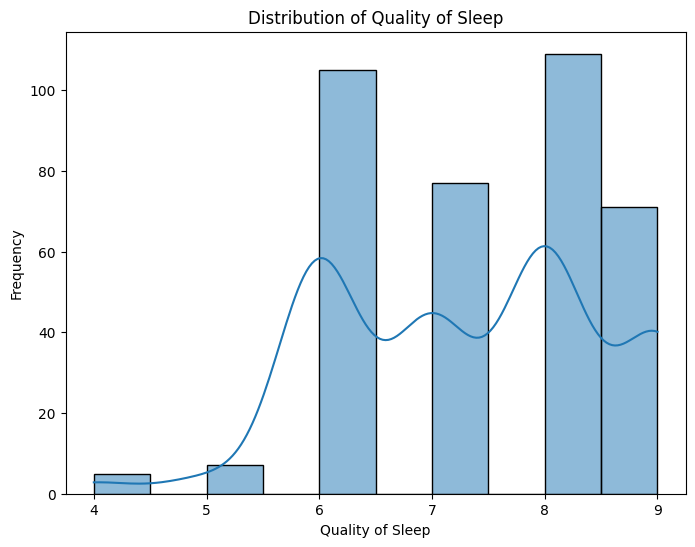

count    374.000000
mean       7.312834
std        1.196956
min        4.000000
25%        6.000000
50%        7.000000
75%        8.000000
max        9.000000
Name: Quality of Sleep, dtype: float64
Number of participants with the highest sleep quality rating (9): 71


In [ ]:
# Check the distribution of 'Quality of Sleep'
plt.figure(figsize=(8, 6))
sns.histplot(df['Quality of Sleep'], kde=True)
plt.title('Distribution of Quality of Sleep')
plt.xlabel('Quality of Sleep')
plt.ylabel('Frequency')
plt.show()

# Calculate descriptive statistics for 'Quality of Sleep'
print(df['Quality of Sleep'].describe())

# Explore potential ceiling effects by looking at the frequency of the highest ratings
max_sleep_quality = df['Quality of Sleep'].max()
ceiling_effect_count = len(df[df['Quality of Sleep'] == max_sleep_quality])
print(f"Number of participants with the highest sleep quality rating ({max_sleep_quality}):", ceiling_effect_count)



Analysis of Stress Level: The stress level distribution shows that it, in general, is close to a negative linear relationship which is exactly what we would assume (the more stress, the less sleep.)

Correlation between Stress Level and Quality of Sleep: -0.8987520310040437


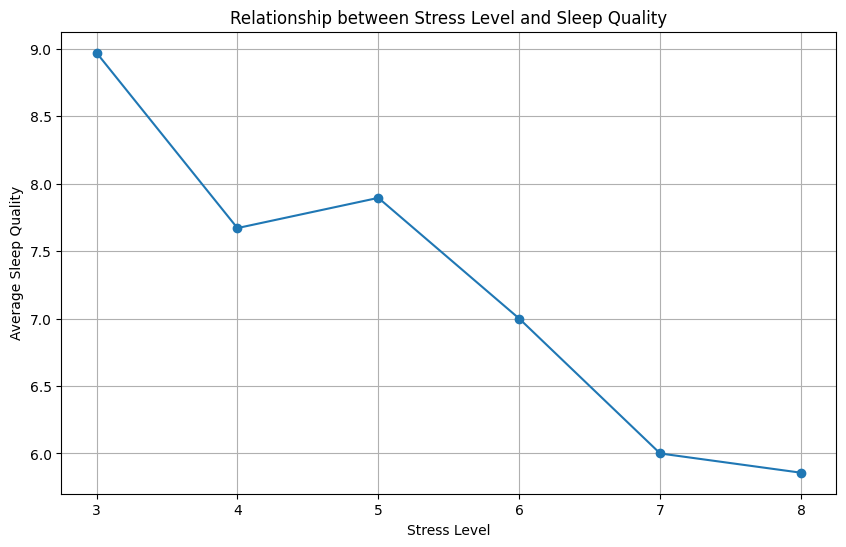

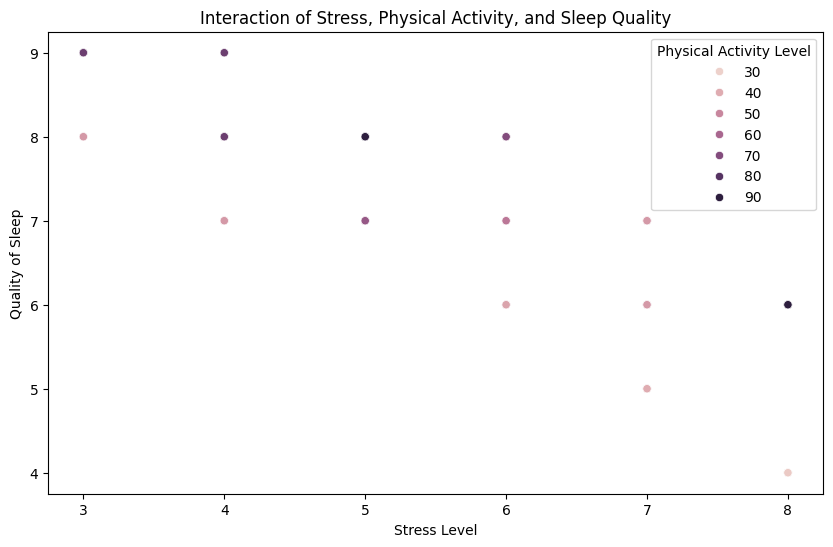

In [ ]:
# Calculate the correlation between stress level and sleep quality.
correlation_stress_sleep = df['Stress Level'].corr(df['Quality of Sleep'])
print(f"Correlation between Stress Level and Quality of Sleep: {correlation_stress_sleep}")

# Group data by stress level and calculate the mean sleep quality for each group.
stress_sleep_grouped = df.groupby('Stress Level')['Quality of Sleep'].mean()

# Plot the relationship
plt.figure(figsize=(10, 6))
plt.plot(stress_sleep_grouped.index, stress_sleep_grouped.values, marker='o')
plt.xlabel('Stress Level')
plt.ylabel('Average Sleep Quality')
plt.title('Relationship between Stress Level and Sleep Quality')
plt.grid(True)
plt.show()

# Explore the interaction between stress and other factors (example: physical activity).
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Stress Level', y='Quality of Sleep', hue='Physical Activity Level', data=df)
plt.xlabel('Stress Level')
plt.ylabel('Quality of Sleep')
plt.title('Interaction of Stress, Physical Activity, and Sleep Quality')
plt.show()

Analysis of BMI Category: The distribution of BMI categories should be analyzed in conjunction with sleep quality. Obese here we can see has the largest range for quality of sleep, which goes to indicate that it might be a relationship we would want to investigate.

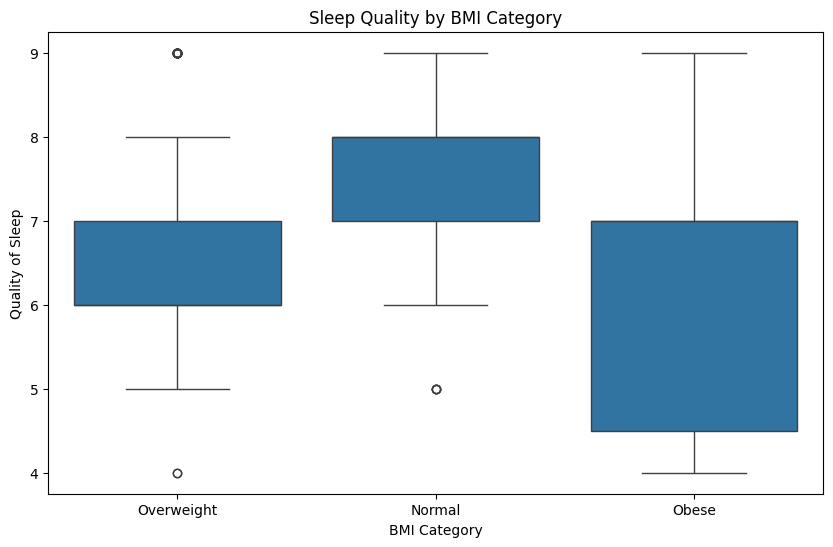

              count      mean       std  min  25%  50%  75%  max
BMI Category                                                    
Normal        216.0  7.638889  0.997283  5.0  7.0  8.0  8.0  9.0
Obese          10.0  6.400000  1.897367  4.0  4.5  7.0  7.0  9.0
Overweight    148.0  6.898649  1.254867  4.0  6.0  6.0  7.0  9.0
ANOVA results: F-statistic=22.01, p-value=0.000
There is a statistically significant difference in sleep quality among different BMI categories.


In [ ]:
# Analysis of BMI Category and Sleep Quality
plt.figure(figsize=(10, 6))
sns.boxplot(x='BMI Category', y='Quality of Sleep', data=df)
plt.title('Sleep Quality by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Quality of Sleep')
plt.show()

#Further analysis (example using groupby and describe)
bmi_sleep_stats = df.groupby('BMI Category')['Quality of Sleep'].describe()
print(bmi_sleep_stats)

from scipy.stats import f_oneway #for ANOVA

# Group data by BMI category
groups = [df['Quality of Sleep'][df['BMI Category'] == bmi] for bmi in df['BMI Category'].unique()]

# Perform one-way ANOVA test
f_statistic, p_value = f_oneway(*groups)
print(f"ANOVA results: F-statistic={f_statistic:.2f}, p-value={p_value:.3f}")

#Interpretation of ANOVA result
alpha = 0.05  # Significance level
if p_value < alpha:
  print("There is a statistically significant difference in sleep quality among different BMI categories.")
else:
  print("There is no statistically significant difference in sleep quality among different BMI categories.")

Analysis of Blood Pressure: The systolic and diastolic blood pressure show a positive correlation.

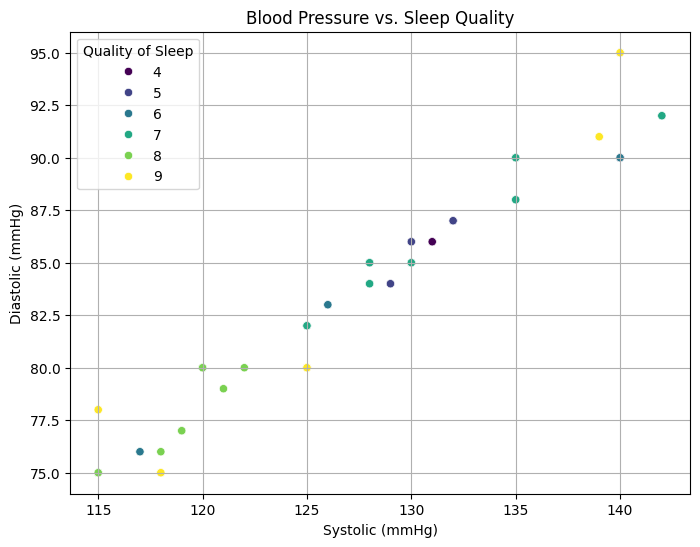

Correlation between Systolic Blood Pressure and Sleep Quality: -0.12, p-value: 0.019
Correlation between Diastolic Blood Pressure and Sleep Quality: -0.11, p-value: 0.033


In [ ]:

# Investigate the combined effect of blood pressure on sleep quality (example)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='systolic', y='diastolic', hue='Quality of Sleep', data=df, palette='viridis')
plt.title("Blood Pressure vs. Sleep Quality")
plt.xlabel("Systolic (mmHg)")
plt.ylabel("Diastolic (mmHg)")
plt.grid(True)
plt.show()

# Calculate the correlation between systolic/diastolic blood pressure and sleep quality
corr_systolic, p_systolic = pearsonr(df['systolic'], df['Quality of Sleep'])
corr_diastolic, p_diastolic = pearsonr(df['diastolic'], df['Quality of Sleep'])

print(f"Correlation between Systolic Blood Pressure and Sleep Quality: {corr_systolic:.2f}, p-value: {p_systolic:.3f}")
print(f"Correlation between Diastolic Blood Pressure and Sleep Quality: {corr_diastolic:.2f}, p-value: {p_diastolic:.3f}")

Analysis of Heart Rate: It seems that in general the lower heart rate, the better sleep quality, with a very interesting effect for sleep quality = 7.

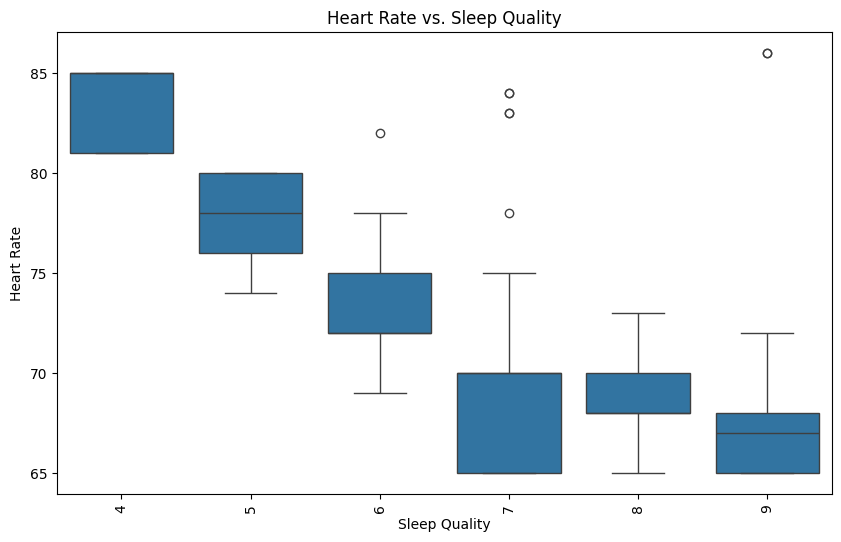

Correlation between Heart Rate and Sleep Quality: -0.66
P-value: 0.000


In [ ]:
# Analyze heart rate distribution for outliers and its relationship with sleep quality.
plt.figure(figsize=(10, 6))
sns.boxplot(x='Quality of Sleep', y='Heart Rate', data=df)
plt.title('Heart Rate vs. Sleep Quality')
plt.xlabel('Sleep Quality')
plt.ylabel('Heart Rate')
plt.xticks(rotation=90)
# plt.gca().xaxis.set_major_formatter(formatter)
plt.show()

# Calculate the correlation between heart rate and sleep quality
correlation, p_value = pearsonr(df['Heart Rate'], df['Quality of Sleep'])
print(f"Correlation between Heart Rate and Sleep Quality: {correlation:.2f}")
print(f"P-value: {p_value:.3f}")

Analysis of Daily Steps: Daily steps show a wide range.

Correlation between Daily Steps and Quality of Sleep: 0.01679141492471579


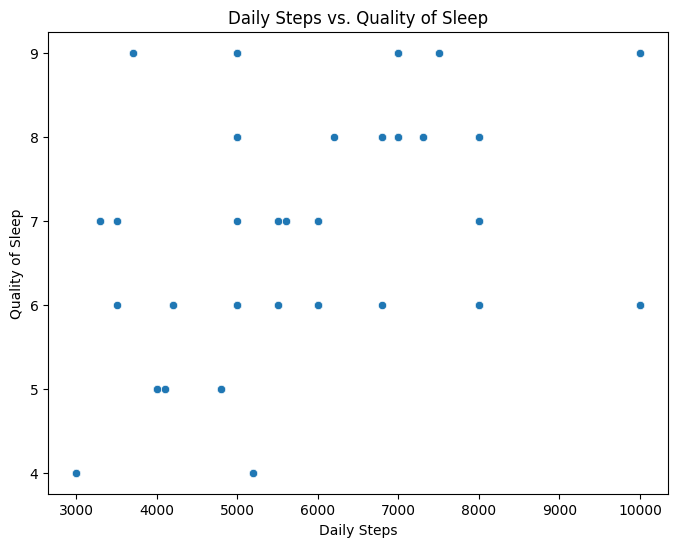

In [ ]:
# Calculate the correlation between Daily Steps and Quality of Sleep
correlation = df['Daily Steps'].corr(df['Quality of Sleep'])
print(f"Correlation between Daily Steps and Quality of Sleep: {correlation}")

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Daily Steps', y='Quality of Sleep', data=df)
plt.title('Daily Steps vs. Quality of Sleep')
plt.xlabel('Daily Steps')
plt.ylabel('Quality of Sleep')
plt.show()

Analysis of Sleep Disorder: The average quality of sleep seems to be almost equal across all categories which is fairly surprising - especially given how much higher the quantity of people had no sleep disorder.

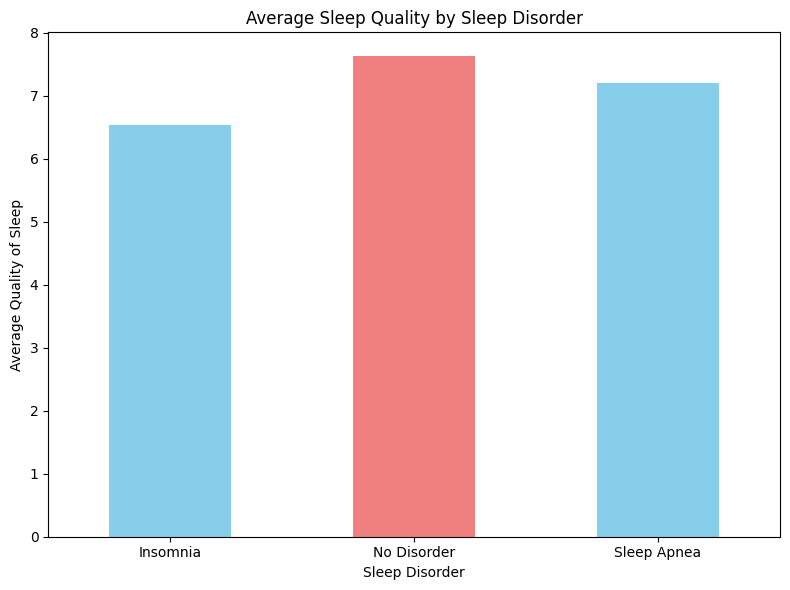

Mann-Whitney U test statistic: 22781.0
P-value: 5.7473470562437014e-09


In [ ]:
# Group data by 'Sleep Disorder' and calculate the mean 'Quality of Sleep' for each group
sleep_disorder_quality = df.groupby('Sleep Disorder')['Quality of Sleep'].mean()

# Create a bar plot to visualize the comparison
plt.figure(figsize=(8, 6))
sleep_disorder_quality.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Average Sleep Quality by Sleep Disorder')
plt.xlabel('Sleep Disorder')
plt.ylabel('Average Quality of Sleep')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

group1 = df[df['Sleep Disorder'] == 'No Disorder']['Quality of Sleep']
group2 = df[df['Sleep Disorder'] != 'No Disorder']['Quality of Sleep']

from scipy.stats import mannwhitneyu

statistic, p_value = mannwhitneyu(group1, group2)
print(f"Mann-Whitney U test statistic: {statistic}")
print(f"P-value: {p_value}")

### Step 4: Baseline Model

Before we do any modeling, we must first modify our one-hot encoding of Sleep Disorder into a single column with 0 for No Disorder, 1 for Sleep Apnea, and 2 for Insomnia.

In [ ]:
 df_modeling = df_one_hot.copy()  # Make sure this line is before using df_modeling

# Define the mapping logic
conditions = [
    df_modeling['Sleep Disorder_No Disorder'] == 1,
    df_modeling['Sleep Disorder_Sleep Apnea'] == 1,
    df_modeling['Sleep Disorder_Insomnia'] == 1
]
choices = [0, 1, 2]  # Map these conditions to values

# Create a single column with the encoded values
df_modeling['Sleep Disorder_Encoded'] = np.select(conditions, choices, default=-1)  # -1 if no condition matches

# Drop all of the 3 original sleep disorder columns
df_modeling = df_modeling.drop(columns = ['Sleep Disorder_No Disorder', 'Sleep Disorder_Insomnia', 'Sleep Disorder_Sleep Apnea'], axis=1)

# And these are the other columns we'd like to drop
df_modeling = df_modeling.drop(columns = ['Age_Group', 'Sleep_Duration_Groups', 'Cluster'], axis=1)

df_modeling.head()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,systolic,diastolic,...,Occupation_Lawyer,Occupation_Manager,Occupation_Nurse,Occupation_Salesperson,Occupation_Scientist,Occupation_Teacher,BMI Category_Normal,BMI Category_Obese,BMI Category_Overweight,Sleep Disorder_Encoded
0,1,-1.753096,-1.298887,-1.098280,-0.825418,0.347021,1.654719,-1.619584,-0.330002,-0.268102,...,0,0,0,0,0,0,0,0,1,0
1,2,-1.637643,-1.173036,-1.098280,0.039844,1.475592,1.170474,1.970077,-0.459239,-0.755640,...,0,0,0,0,0,0,1,0,0,0
2,3,-1.637643,-1.173036,-1.098280,0.039844,1.475592,1.170474,1.970077,-0.459239,-0.755640,...,0,0,0,0,0,0,1,0,0,0
3,4,-1.637643,-1.550588,-2.771424,-1.402260,1.475592,3.591698,-2.362273,1.479309,0.869486,...,0,0,0,1,0,0,0,1,0,1
4,5,-1.637643,-1.550588,-2.771424,-1.402260,1.475592,3.591698,-2.362273,1.479309,0.869486,...,0,0,0,1,0,0,0,1,0,1


In [ ]:
print(df_modeling)

     Person ID       Age  Sleep Duration  Quality of Sleep  \
0            1 -1.753096       -1.298887         -1.098280   
1            2 -1.637643       -1.173036         -1.098280   
2            3 -1.637643       -1.173036         -1.098280   
3            4 -1.637643       -1.550588         -2.771424   
4            5 -1.637643       -1.550588         -2.771424   
..         ...       ...             ...               ...   
369        370  1.941401        1.218127          1.411435   
370        371  1.941401        1.092276          1.411435   
371        372  1.941401        1.218127          1.411435   
372        373  1.941401        1.218127          1.411435   
373        374  1.941401        1.218127          1.411435   

     Physical Activity Level  Stress Level  Heart Rate  Daily Steps  systolic  \
0                  -0.825418      0.347021    1.654719    -1.619584 -0.330002   
1                   0.039844      1.475592    1.170474     1.970077 -0.459239   
2           

##### **kNN Model**

For our first baseline model, we implemented a kNN model.

Here, we are reporting macro-averaged precision, recall, and F1 score in addition to the overall accuracy. This macro-averaging is done because of the class-imbalance that exists in our dataset.

We selected macro-averaging instead of weighted-averaging because the importance of classifying each type of sleep disorder is equally important (the larger class, having no sleep disorder, is not more important to classify).


In [ ]:
# Select your features (X) and target variable (y)
X = df_modeling.drop('Sleep Disorder_Encoded', axis=1)
y = df_modeling['Sleep Disorder_Encoded']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # Stratifying improves classification results

# Create empty array for our results:
results = []
best_metrics = {}

# Create starting value for our best_accuracy:
best_accuracy = 0

# We want to loop through to find the best k:
for k in range(1,21):

  # Create a kNN classifier
  knn = KNeighborsClassifier(n_neighbors=k)

  # Train the model
  knn.fit(X_train, y_train)

  # Make predictions on the test set
  y_pred_kNN = knn.predict(X_test)

  # Evaluate the model
  accuracy_kNN = accuracy_score(y_test, y_pred_kNN)
  precision_kNN = precision_score(y_test, y_pred_kNN, average='macro')
  recall_kNN = recall_score(y_test, y_pred_kNN, average='macro')
  f1_kNN = f1_score(y_test, y_pred_kNN, average='macro')

  # Store the results
  results.append({'k': k, 'accuracy': accuracy_kNN, 'precision': precision_kNN, 'recall': recall_kNN, 'f1': f1_kNN})

  # Print metrics for current k
  print(f"k={k}: Accuracy={accuracy_kNN:.3f}, Precision={precision_kNN:.3f}, Recall={recall_kNN:.3f}, F1={f1_kNN:.3f}")

  if accuracy_kNN > best_accuracy:
    best_accuracy = accuracy_kNN
    best_k = k
    best_kNN_metrics = {
            'accuracy': accuracy_kNN,
            'precision': precision_kNN,
            'recall': recall_kNN,
            'f1': f1_kNN
        }
    best_kNN_classification_report = classification_report(y_test, y_pred_kNN, digits=3)

print("-"*20)
print('kNN Model Results:')
print(f"Best k: {best_k}")
print(f"Accuracy: {best_kNN_metrics['accuracy']:.3f}")
print(f"Macro-Averaged Precision: {best_kNN_metrics['precision']:.3f}")
print(f"Macro-Averaged Recall: {best_kNN_metrics['recall']:.3f}")
print(f"Macro-Averaged F1-Score: {best_kNN_metrics['f1']:.3f}")
print("\nClassification Report:\n", best_kNN_classification_report)

k=1: Accuracy=0.893, Precision=0.871, Recall=0.872, F1=0.869
k=2: Accuracy=0.893, Precision=0.914, Recall=0.856, F1=0.880
k=3: Accuracy=0.907, Precision=0.920, Recall=0.878, F1=0.897
k=4: Accuracy=0.893, Precision=0.914, Recall=0.856, F1=0.880
k=5: Accuracy=0.907, Precision=0.904, Recall=0.893, F1=0.898
k=6: Accuracy=0.893, Precision=0.896, Recall=0.870, F1=0.882
k=7: Accuracy=0.893, Precision=0.885, Recall=0.885, F1=0.885
k=8: Accuracy=0.907, Precision=0.904, Recall=0.893, F1=0.898
k=9: Accuracy=0.893, Precision=0.885, Recall=0.885, F1=0.885
k=10: Accuracy=0.880, Precision=0.877, Recall=0.863, F1=0.869
k=11: Accuracy=0.867, Precision=0.868, Recall=0.841, F1=0.853
k=12: Accuracy=0.867, Precision=0.860, Recall=0.855, F1=0.857
k=13: Accuracy=0.840, Precision=0.843, Recall=0.811, F1=0.823
k=14: Accuracy=0.840, Precision=0.843, Recall=0.811, F1=0.823
k=15: Accuracy=0.853, Precision=0.851, Recall=0.833, F1=0.840
k=16: Accuracy=0.840, Precision=0.843, Recall=0.811, F1=0.823
k=17: Accuracy=0.

##### **Logistic Regression**
Additionally, we adopted a logistic regression model as for comparison.


In [ ]:
# Split data into training and testing sets
# Use same as before

# Initialize and train the Logistic Regression model
logreg_model = LogisticRegression(max_iter=5000)

# Set our parameter grid and complete CV search
param_grid = {
    'C': [0.1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}
grid_search = GridSearchCV(logreg_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print out our best parameters:
print("Best Logistic Regression Parameters: ", grid_search.best_params_)

# Make predictions
best_model = grid_search.best_estimator_
y_pred_logreg = best_model.predict(X_test)

# Evaluate the model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg, average='macro')
recall_logreg = recall_score(y_test, y_pred_logreg, average='macro')
f1_logreg = f1_score(y_test, y_pred_logreg, average='macro')

# Print results
print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_logreg:.3f}")
print(f"Macro-Averaged Precision: {precision_logreg:.3f}")
print(f"Macro-Averaged Recall: {recall_logreg:.3f}")
print(f"Macro-Averaged F1-Score: {f1_logreg:.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_logreg, digits=3))

Best Logistic Regression Parameters:  {'C': 5, 'penalty': 'l1', 'solver': 'liblinear'}
Logistic Regression Results:
Accuracy: 0.933
Macro-Averaged Precision: 0.949
Macro-Averaged Recall: 0.906
Macro-Averaged F1-Score: 0.926

Classification Report:
               precision    recall  f1-score   support

           0      0.915     0.977     0.945        44
           1      0.933     0.875     0.903        16
           2      1.000     0.867     0.929        15

    accuracy                          0.933        75
   macro avg      0.949     0.906     0.926        75
weighted avg      0.936     0.933     0.933        75



## Milestone 4 Progress


---



#### **Final Model Pipeline**

For our final model pipeline, we wanted to explore a few options before we jumped straight to Boosting. We anticipated that Boosting would be our best option based on how frequently Pavlos says it is the best model during lecture!

##### **Decision Tree**

We started by implenting a Decision Tree model. We used GridSearchCV to find the best hyperparameter settings, optimizing accuracy as our scoring metric.

We were a bit surprised that our Decision Tree model performed worse than both our kNN and Logistic Regression model that we previously implemented (during Milestone 3). However, we have a few ideas why this might be the case, which you can see in a section below once all the models are run.


In [ ]:
# Split data into training and testing sets
# Use same as before

# Initialize and train the Logistic Regression model
dt_model = DecisionTreeClassifier()

# Set our parameter grid and complete CV search
param_grid = {
    'max_depth': [1, 2, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 50],
    'min_samples_split': [2, 5, 10, 20, 30, 40, 50],
    'min_samples_leaf': [1, 2, 3, 5, 10, 15],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'] # Thought this would make things better but it didn't
}
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print out our best parameters:
print("Best Decision Tree Parameters: ", grid_search.best_params_)

# Make predictions
best_model = grid_search.best_estimator_
y_pred_dt = best_model.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='macro')
recall_dt = recall_score(y_test, y_pred_dt, average='macro')
f1_dt = f1_score(y_test, y_pred_dt, average='macro')

# Print results
print("Decision Tree Results:")
print(f"Accuracy: {accuracy_dt:.3f}")
print(f"Macro-Averaged Precision: {precision_dt:.3f}")
print(f"Macro-Averaged Recall: {recall_dt:.3f}")
print(f"Macro-Averaged F1-Score: {f1_dt:.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, digits=3))

Best Decision Tree Parameters:  {'criterion': 'entropy', 'max_depth': 14, 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'random'}
Decision Tree Results:
Accuracy: 0.880
Macro-Averaged Precision: 0.876
Macro-Averaged Recall: 0.849
Macro-Averaged F1-Score: 0.859

Classification Report:
               precision    recall  f1-score   support

           0      0.891     0.932     0.911        44
           1      0.923     0.750     0.828        16
           2      0.812     0.867     0.839        15

    accuracy                          0.880        75
   macro avg      0.876     0.849     0.859        75
weighted avg      0.882     0.880     0.879        75



/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [ ]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Define a pipeline with PCA and Decision Tree
pipeline = Pipeline([
    ('pca', PCA()),
    ('dt', DecisionTreeClassifier())
])

# Set parameter grid for both PCA and Decision Tree
param_grid = {
    'pca__n_components': [5, 10, 15, 20, 30, 50],
    'dt__max_depth': [1, 2, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 50],
    'dt__min_samples_split': [2, 5, 10, 20, 30, 40, 50],
    'dt__min_samples_leaf': [1, 2, 3, 5, 10, 15],
    'dt__criterion': ['gini', 'entropy'],
    'dt__splitter': ['best', 'random']
}

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print out best parameters
print("Best Parameters with PCA and Decision Tree: ", grid_search.best_params_)

# Make predictions with the best model
best_model_dt_PCA = grid_search.best_estimator_
y_pred_dt_PCA = best_model_dt_PCA.predict(X_test)

# Evaluate the model
accuracy_dt_PCA = accuracy_score(y_test, y_pred_dt_PCA)
precision_dt_PCA = precision_score(y_test, y_pred_dt_PCA, average='macro')
recall_dt_PCA = recall_score(y_test, y_pred_dt_PCA, average='macro')
f1_dt_PCA = f1_score(y_test, y_pred_dt_PCA, average='macro')

# Print results
print("Decision Tree Results (with PCA):")
print(f"Accuracy: {accuracy_dt_PCA:.3f}")
print(f"Macro-Averaged Precision: {precision_dt_PCA:.3f}")
print(f"Macro-Averaged Recall: {recall_dt_PCA:.3f}")
print(f"Macro-Averaged F1-Score: {f1_dt_PCA:.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt_PCA, digits=3))


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
25200 fits failed out of a total of 75600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10080 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 469, in fit
    Xt = self._fit(X, y, routed_params)
  File "/usr/local/lib/python3.10/dist-pac

Best Parameters with PCA and Decision Tree:  {'dt__criterion': 'entropy', 'dt__max_depth': 20, 'dt__min_samples_leaf': 1, 'dt__min_samples_split': 5, 'dt__splitter': 'random', 'pca__n_components': 10}
Decision Tree Results (with PCA):
Accuracy: 0.813
Macro-Averaged Precision: 0.803
Macro-Averaged Recall: 0.769
Macro-Averaged F1-Score: 0.784

Classification Report:
               precision    recall  f1-score   support

           0      0.830     0.886     0.857        44
           1      0.733     0.688     0.710        16
           2      0.846     0.733     0.786        15

    accuracy                          0.813        75
   macro avg      0.803     0.769     0.784        75
weighted avg      0.812     0.813     0.811        75



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:1103: UserWarning: One or more of the test scores are non-finite: [0.6220339  0.6220339  0.6220339  ... 0.84288136        nan        nan]
  warnings.warn(


##### **Decision Tree with Bagging**

The next model we implemented was a decision tree model with bagging. We wanted to see if we could improve our results with a decision tree model to perform better than our baseline kNN and logistic regression models.

We wanted to add a few reasons and ideas for how we could continue bettering this (and applicable in general):

1) Insufficient diversity in bagging samples (our data in general, especially training after we split train/test, is fairly small. Could strive for a better score with more random data generation.) <br>
2) Overfitting of the decision tree/ high complexity: could attempt to tune the hyperparameters such as max_depth, min_samples_split or min_samples_leaf. <br>
3) GridSearch CV Setting the same parameters : again we could tune the hyperparameters more for an attempt at a fix here. <br>

In [ ]:
# Initialize the Bagging Classifier model
bag_model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, oob_score=True, random_state=42) # Followed what we did in Lab 10 (but with classification)

# Set our parameter grid and complete CV search
param_grid_bag  = {
    'estimator__max_depth': [5, 10],
    'estimator__min_samples_split': [2, 5],
    'estimator__min_samples_leaf': [1, 5],
    'n_estimators': [50, 100],
    'max_samples': [0.5, 1.0],
    'max_features': [0.7, 1.0]
}
grid_search_bag = GridSearchCV(estimator=bag_model, param_grid=param_grid_bag, scoring='accuracy', cv=5, n_jobs=-1)
grid_search_bag.fit(X_train, y_train)

# Print out the best parameters
print("Best Bagging Classifier Parameters: ", grid_search_bag.best_params_)

# Make predictions
best_model_bag = grid_search_bag.best_estimator_
y_pred_bag = best_model_bag.predict(X_test)

# Evaluate the model
accuracy_bag = accuracy_score(y_test, y_pred_bag)
precision_bag = precision_score(y_test, y_pred_bag, average='macro')
recall_bag = recall_score(y_test, y_pred_bag, average='macro')
f1_bag = f1_score(y_test, y_pred_bag, average='macro')

# Print results
print("Bagging Classifier Results:")
print(f"Accuracy: {accuracy_bag:.3f}")
print(f"Macro-Averaged Precision: {precision_bag:.3f}")
print(f"Macro-Averaged Recall: {recall_bag:.3f}")
print(f"Macro-Averaged F1-Score: {f1_bag:.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_bag, digits=3))


Best Bagging Classifier Parameters:  {'estimator__max_depth': 10, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'max_features': 0.7, 'max_samples': 1.0, 'n_estimators': 50}
Bagging Classifier Results:
Accuracy: 0.920
Macro-Averaged Precision: 0.924
Macro-Averaged Recall: 0.885
Macro-Averaged F1-Score: 0.903

Classification Report:
               precision    recall  f1-score   support

           0      0.915     0.977     0.945        44
           1      0.929     0.812     0.867        16
           2      0.929     0.867     0.897        15

    accuracy                          0.920        75
   macro avg      0.924     0.885     0.903        75
weighted avg      0.921     0.920     0.919        75



##### **Random Forest**

In [ ]:
# Initialize the Random Forest model with class_weight='balanced'
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Set our parameter grid and complete CV search
param_grid_rf = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [5, 10, 15, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt'],
    'criterion': ['gini', 'entropy']  # Criterion for splits
}

# Perform GridSearchCV with 5-fold cross-validation
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, scoring='accuracy', cv=5, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Print out the best parameters
print("Best Random Forest Parameters: ", grid_search_rf.best_params_)

# Make predictions with the best model
best_model_rf = grid_search_rf.best_estimator_
y_pred_rf = best_model_rf.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='macro')
recall_rf = recall_score(y_test, y_pred_rf, average='macro')
f1_rf = f1_score(y_test, y_pred_rf, average='macro')

# Print results
print("Random Forest Results:")
print(f"Accuracy: {accuracy_rf:.3f}")
print(f"Macro-Averaged Precision: {precision_rf:.3f}")
print(f"Macro-Averaged Recall: {recall_rf:.3f}")
print(f"Macro-Averaged F1-Score: {f1_rf:.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf, digits=3))


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Random Forest Parameters:  {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}
Random Forest Results:
Accuracy: 0.933
Macro-Averaged Precision: 0.932
Macro-Averaged Recall: 0.908
Macro-Averaged F1-Score: 0.919

Classification Report:
               precision    recall  f1-score   support

           0      0.935     0.977     0.956        44
           1      0.929     0.812     0.867        16
           2      0.933     0.933     0.933        15

    accuracy                          0.933        75
   macro avg      0.932     0.908     0.919        75
weighted avg      0.933     0.933     0.932        75



##### **Boosting**

The primary downsides to bagging and random forest models is that they are complex and deep trees tend to overfit the training data. Boosting is a good alternative because it utilizes simple and shallow trees, which underfit the data. By performing bias reduction of many simple trees, we can improve the predictive capability of these simple models.

In [ ]:
# Initialize the AdaBoost model with a DecisionTreeClassifier as the base estimator
adaboost_model = AdaBoostClassifier(estimator=DecisionTreeClassifier(), random_state=42)

# Define a parameter grid for AdaBoost and its base estimator
param_grid_boost = {
    'n_estimators': [50, 100, 150],  # Number of weak learners
    'learning_rate': [0.5, 1.0, 1.5],  # Contribution of each learner
    'estimator__max_depth': [1, 3, 5],  # Depth of base DecisionTreeClassifier
    'estimator__min_samples_split': [2, 5],  # Minimum samples for a split
    'estimator__min_samples_leaf': [1, 2]  # Minimum samples in a leaf
}

# Set up GridSearchCV for hyperparameter tuning
grid_search_boost = GridSearchCV(
    estimator=adaboost_model,
    param_grid=param_grid_boost,
    scoring='accuracy',
    cv=5,  # 3-fold cross-validation for faster results
    n_jobs=-1  # Use all available CPU cores
)

# Fit the model on the training data
grid_search_boost.fit(X_train, y_train)

# Print out the best parameters
print("Best AdaBoost Parameters: ", grid_search_boost.best_params_)

# Make predictions on the test set
best_model_boost = grid_search_boost.best_estimator_
y_pred_boost = best_model_boost.predict(X_test)

# Evaluate the model
accuracy_boost = accuracy_score(y_test, y_pred_boost)
precision_boost = precision_score(y_test, y_pred_boost, average='macro')
recall_boost = recall_score(y_test, y_pred_boost, average='macro')
f1_boost = f1_score(y_test, y_pred_boost, average='macro')

# Print results
print("AdaBoost Results:")
print(f"Accuracy: {accuracy_boost:.3f}")
print(f"Macro-Averaged Precision: {precision_boost:.3f}")
print(f"Macro-Averaged Recall: {recall_boost:.3f}")
print(f"Macro-Averaged F1-Score: {f1_boost:.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_boost, digits=3))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best AdaBoost Parameters:  {'estimator__max_depth': 3, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 5, 'learning_rate': 1.5, 'n_estimators': 100}
AdaBoost Results:
Accuracy: 0.933
Macro-Averaged Precision: 0.950
Macro-Averaged Recall: 0.894
Macro-Averaged F1-Score: 0.916

Classification Report:
               precision    recall  f1-score   support

           0      0.917     1.000     0.957        44
           1      1.000     0.750     0.857        16
           2      0.933     0.933     0.933        15

    accuracy                          0.933        75
   macro avg      0.950     0.894     0.916        75
weighted avg      0.938     0.933     0.931        75



##### **Decision Tree with Random Forest**

Here, we use an ensemble learning technique called the Voting Classifier, which combines the best-tuned models from grid searches for both the decision tree and random forest. The Voting Classifier aggregates predictions from both models to make a final prediction.

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Combine the tuned Bagging Classifier and Random Forest into a Voting Classifier
voting_clf = VotingClassifier(
    estimators=[
        ('bagging', grid_search_bag.best_estimator_),
        ('random_forest', grid_search_rf.best_estimator_)
    ],
    voting='soft',
    weights=[1, 2]  # Random Forest has twice the weight
)

# Train the Voting Classifier
voting_clf.fit(X_train, y_train)

# Make predictions
y_pred_voting = voting_clf.predict(X_test)

# Evaluate the Voting Classifier
accuracy_voting = accuracy_score(y_test, y_pred_voting)
precision_voting = precision_score(y_test, y_pred_voting, average='macro')
recall_voting = recall_score(y_test, y_pred_voting, average='macro')
f1_voting = f1_score(y_test, y_pred_voting, average='macro')

# Print results
print("Voting Classifier Results:")
print(f"Accuracy: {accuracy_voting:.3f}")
print(f"Macro-Averaged Precision: {precision_voting:.3f}")
print(f"Macro-Averaged Recall: {recall_voting:.3f}")
print(f"Macro-Averaged F1-Score: {f1_voting:.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_voting, digits=3))


Voting Classifier Results:
Accuracy: 0.920
Macro-Averaged Precision: 0.924
Macro-Averaged Recall: 0.885
Macro-Averaged F1-Score: 0.903

Classification Report:
               precision    recall  f1-score   support

           0      0.915     0.977     0.945        44
           1      0.929     0.812     0.867        16
           2      0.929     0.867     0.897        15

    accuracy                          0.920        75
   macro avg      0.924     0.885     0.903        75
weighted avg      0.921     0.920     0.919        75



##### **Summary of All Model Results**


In [ ]:
# Initialize a list to store model performance
model_performance = []

# Add performance metrics for each model
# kNN
model_performance.append({
    'Model': 'kNN',
    'Accuracy': best_kNN_metrics['accuracy'],
    'Precision (Macro)': best_kNN_metrics['precision'],
    'Recall (Macro)': best_kNN_metrics['recall'],
    'F1-Score (Macro)': best_kNN_metrics['f1']
})

# Logistic Regression
model_performance.append({
    'Model': 'Logistic Regression',
    'Accuracy': accuracy_logreg,
    'Precision (Macro)': precision_logreg,
    'Recall (Macro)': recall_logreg,
    'F1-Score (Macro)': f1_logreg
})

# Decision Tree
model_performance.append({
    'Model': 'Decision Tree',
    'Accuracy': accuracy_dt,
    'Precision (Macro)': precision_dt,
    'Recall (Macro)': recall_dt,
    'F1-Score (Macro)': f1_dt
})

# Decision Tree with PCA
model_performance.append({
    'Model': 'Decision Tree with PCA',
    'Accuracy': accuracy_dt_PCA,
    'Precision (Macro)': precision_dt_PCA,
    'Recall (Macro)': recall_dt_PCA,
    'F1-Score (Macro)': f1_dt_PCA
})

# Decision Tree with Bagging Classifier
model_performance.append({
    'Model': 'Bagging',
    'Accuracy': accuracy_bag,
    'Precision (Macro)': precision_bag,
    'Recall (Macro)': recall_bag,
    'F1-Score (Macro)': f1_bag
})

# Random forest
model_performance.append({
    'Model': 'Random Forest',
    'Accuracy': accuracy_rf,
    'Precision (Macro)': precision_rf,
    'Recall (Macro)': recall_rf,
    'F1-Score (Macro)': f1_rf
})

# Boosting Classifier
model_performance.append({
    'Model': 'Boosting',
    'Accuracy': accuracy_boost,
    'Precision (Macro)': precision_boost,
    'Recall (Macro)': recall_boost,
    'F1-Score (Macro)': f1_boost
})

# Voting
model_performance.append({
    'Model': 'Voting',
    'Accuracy': accuracy_voting,
    'Precision (Macro)': precision_voting,
    'Recall (Macro)': recall_voting,
    'F1-Score (Macro)': f1_voting
})

# Create a DataFrame for better visualization
performance_df = pd.DataFrame(model_performance)

# Display the performance comparison
print("\nModel Performance Comparison:")
performance_df = performance_df.round(3)
display(performance_df)


Model Performance Comparison:


,Model,Accuracy,Precision (Macro),Recall (Macro),F1-Score (Macro)
0,kNN,0.907,0.920,0.878,0.897
1,Logistic Regression,0.933,0.949,0.906,0.926
2,Decision Tree,0.880,0.876,0.849,0.859
3,Decision Tree with PCA,0.813,0.803,0.769,0.784
4,Bagging,0.920,0.924,0.885,0.903
5,Random Forest,0.933,0.932,0.908,0.919
6,Boosting,0.933,0.950,0.894,0.916
7,Voting,0.920,0.924,0.885,0.903


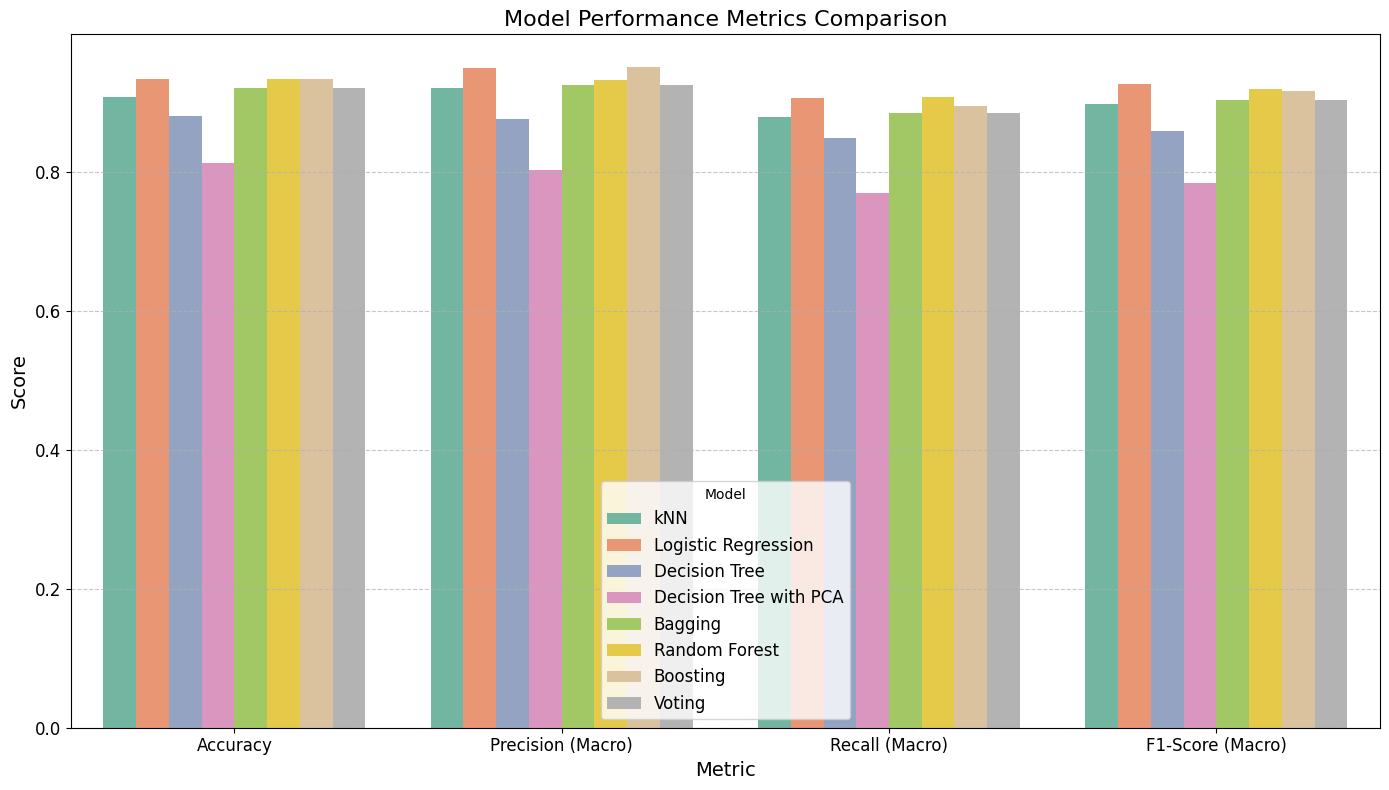

In [ ]:
# Create a melted DataFrame for easier plotting with Seaborn
performance_melted = performance_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Set the figure size
plt.figure(figsize=(14, 8))

# Create a bar plot
sns.barplot(data=performance_melted, x='Metric', y='Score', hue='Model', palette='Set2')

# Customize the plot
plt.title('Model Performance Metrics Comparison', fontsize=16)
plt.ylabel('Score', fontsize=14)
plt.xlabel('Metric', fontsize=14)
plt.legend(title='Model', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


#### **Interpretation of Results**

Based on the five models analyzed earlier, we compared their performance using metrics such as forecasting accuracy, precision, recall, and F1-score.

The results show that logistic regression and bagging classifier achieved the highest prediction accuracy at 0.933, whereas decision tree and kNN did not perform as well. This discrepancy could be attributed to the nature of the synthetic data sourced from Kaggle. As we were surprised logreg did so well here, especially compared to Random Forest, we did some research and realized that there are 2 prevalent reasons for why that may be the case with this data set: <br>
1) the sample size is relatively small, and increasing it might yield different results for the models<br>
2) we have so many predictors (especially considering onehot encoding, but even beforehand)<br>
<br>

**Summary of Models:**
- Logistic Regression + Bagging Classifier emerge as the top performing models, tied in accuracy, but differing in the other strenghts slightly. Logistic Reg leads in F1 score and Recall, while Bagging leads in Precision. <br>
- Random Forest is a strong contender, though slightly behind. <br>
- If we require accuracy and/or precissions, Log Reg or Bagging Classifier should be the first choice.<br>
- kNN and Decision Tree underperform comnpared to the other models, making them less suitable. <br>

<br>

**Conclusion from Models:**<br>
When considering the trade off of high recall vs. precision, our group would argue here that because this is in theory a medical screening, we would prefer high recall in the initial screenings to ensure that all potential cases are flagged for further testing. (So if this is Phase 1 of a larger sleep study experiment that is designed to provide thorough solutions for people, then we would recommend using the model with higher recall aka Logistic Regression.) This would help because it minimizes false negatives and helps to ensure we don't miss any positive cases. (Though some healthy patients might be flagged false positively, that is better than the patients who need to be flagged getting missed due to a false negative. This is thus better than Precision because precision makes fewer mistakes when it predicts a positive, but it matters more that people are flagged as much as possible correctly than having higher precision.)

## Conclusion of Team 9's Project Voyage! 🛬


Overview of the Project: This project explores the issue of sleep disorders among American residents and the associated metrics of sleep quality. Initially, we aimed to analyze sleep-related survey data to uncover insights into sleep quality and, more importantly, to infer potential preventive measures or other significant factors that could serve as references for researchers and healthcare professionals.

Our group focuses on analyzing sleep disorders for preventive or diagnostic purposes. Using data from Kaggle, which includes information on health conditions (e.g., age, heart rate, BMI), lifestyle factors (e.g., physical activity level, stress levels, occupation), and sleep disorder statuses, we address the following research questions: Can we forecast the likelihood of a person having a sleep disorder based on their health and lifestyle factors? How accurate is the prediction model? Which health and lifestyle factors most strongly impact sleep quality? What are the causal relationships between sleep disorders and health or lifestyle conditions?


Milestone 2: Data Cleaning and Preprocessing: We began by downloading the dataset from Kaggle, converting it into a dataframe, and handling missing data. Fortunately, no imputation or deletion was necessary. Before evaluating data imbalance, we visualized key factors, including gender, age, occupation, sleep duration, sleep quality, physical activity level, stress, BMI, blood pressure, heart rate, daily steps, and sleep disorder status. Next, we applied data scaling for standardization and used one-hot encoding to convert categorical variables into binary variables for further analysis.

Milestone 3: Data Analysis and Baseline Modeling: For statistical analysis and visualization, we examined the cleaned data and plotted histograms for key influential factors. A correlation map and heatmap revealed relationships among these factors and their association with different sleep disorder types. Using K-Means clustering, we categorized sleep disorders into three types: insomnia, sleep apnea, and no disorder. Several insights emerged from this analysis. For example, scientists and salespeople reported the lowest sleep quality, while engineers and lawyers had the highest. Higher stress levels correlated with lower sleep quality, and individuals without sleep disorders had the highest sleep quality, followed by those with sleep apnea, while those with insomnia fared the worst.

For baseline modeling, we implemented a kNN model, which achieved a forecasting accuracy of 0.907. Logistic regression was then applied, yielding a higher accuracy of 0.933 and demonstrating better precision compared to kNN. These baseline models provided a solid starting point for further analysis.

Milestone 4: Advanced Modeling: To enhance our models, we began by implementing a decision tree. However, it underperformed compared to the baseline kNN and logistic regression models. To improve accuracy, we embedded the decision tree with bagging, which showed improvement but still lagged behind logistic regression. This may have been due to insufficient diversity in the bagging samples, the limited size of the dataset, or suboptimal parameter tuning.

Next, we experimented with random forest and boosting techniques, which further improved the results and having the same as logistic regression's accuracy of 0.933. The model performance comparison shows that Logistic Regression outperforms other models, achieving the highest F1-Score (0.926) and sharing the highest Accuracy (0.933) with Random Forest and Boosting. While advanced models like Random Forest and Boosting perform well, their F1-Scores (0.919 and 0.916) are slightly lower than Logistic Regression. Voting and Bagging follow closely with similar Accuracy (0.920) but slightly reduced overall metrics. Lower-performing models include Decision Tree and Decision Tree with PCA, with Accuracy ranging from 0.840 to 0.867 and F1-Scores between 0.822 and 0.853. kNN performs moderately well with an Accuracy of 0.907 and an F1-Score of 0.897. This suggests that simpler models like Logistic Regression outperform or match advanced models, likely due to the synthetic dataset and small sample size.

Conclusion: This project aimed to understand how personal health conditions and lifestyle factors impact sleep disorders. Through data cleaning, preprocessing, and visualizations, we uncovered key insights and explored various modeling techniques. While baseline models like kNN and logistic regression performed well, with logistic regression achieving the highest accuracy, advanced models such as decision trees, boosting, and random forests did not significantly outperform simpler methods.

Overall, this project serves as a baseline case for researchers and practitioners interested in studying sleep disorders. While this analysis provides valuable insights, further work is necessary to derive deeper conclusions. Access to larger and more realistic datasets could enhance the reliability and applicability of the findings.


## References


---



#### **Dataset**

The original dataset was retrieved from Kaggle at the following link: [Sleep Health and Lifestyle Dataset](https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset)

*This dataset is synthetic, and the author claims that it did not originate from an existing dataset. Therefore, any conclusions made from this dataset may not be accurate and/or applicable to real-life situations.*

#### **Literature**

[[1] NIH Sleep Health](https://www.nhlbi.nih.gov/health-topics/education-and-awareness/sleep-health)

[[2] American Psychiatric Association - What are Sleep Disorders?](https://www.psychiatry.org/patients-families/sleep-disorders/what-are-sleep-disorders)
